In [2]:
import numpy as np
import matplotlib.pyplot as plt
from buildDataset import *
%matplotlib inline


from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,ConfusionMatrixDisplay,f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
root_path =      DATAPATHS["preprocessed"]


C:\Users\line\Desktop\Mauro\2_Preprocessing_Code\amd\prl\dataset.py:8: FutureWarning: The `skimage.morphology.selem` module is deprecated and will be removed in scikit-image 1.0 (`skimage.morphology.selem` has been moved to `skimage.morphology.footprints`).
  from skimage.morphology import selem


Non ha senso normalizzare le thicknesses
 => aggiunta di un Warning se normalizzi le thicknesses, input normmode = "" per evitare le normalizzazioni
 # TEST SENZA NORM VS CON NORM

In [2]:
# TESTING THICKNESS DATA WITHOUT NORMALIZATION

save_dataset(root_path,mode ='thickness',normmode = '',samplingmode = 'U')
X_train, X_test, y_train, y_test = open_dataset(mode ='thickness',normmode = '',samplingmode = 'U')

C:\Users\line\.conda\envs\OCT\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


recall_score:  0.20976027397260275
precision_score:  0.33313908313908314
accuracy_score:  0.8176960495283019
f1:  0.25743020114079856


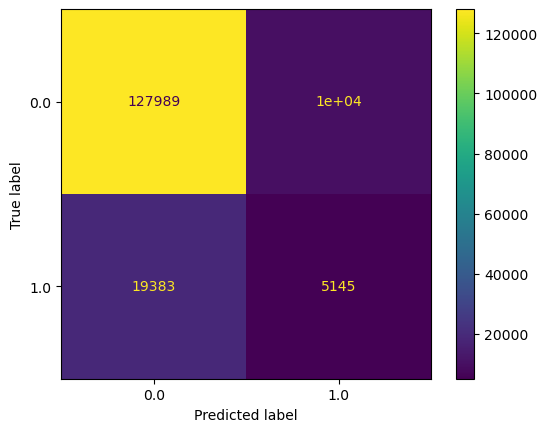

In [3]:
# SVM 
clf = make_pipeline(LinearSVC(random_state=0, tol=1e-5))
clf.fit(X_train, y_train)

y_true =y_test
y_pred = clf.predict(X_test)
print('recall_score: ',recall_score(y_true, y_pred))
print('precision_score: ',precision_score(y_true, y_pred))
print('accuracy_score: ',accuracy_score(y_true, y_pred))
print('f1: ',f1_score(y_true, y_pred))
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

C:\Users\line\.conda\envs\OCT\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


recall_score:  0.24478147423352903
precision_score:  0.47692429899118277
accuracy_score:  0.8457829697327044
f1:  0.3235175256620955


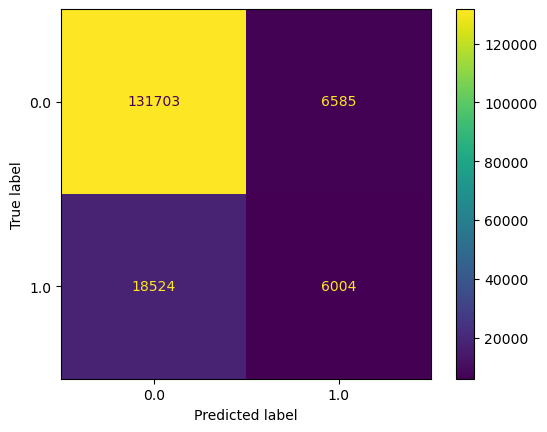

In [4]:
X_train, X_test, y_train, y_test = open_dataset(mode ='thickness',normmode = 'EQ-hist',samplingmode = 'U')
# SVM 
clf = make_pipeline(LinearSVC(random_state=0, tol=1e-5))
clf.fit(X_train, y_train)

y_true =y_test
y_pred = clf.predict(X_test)
print('recall_score: ',recall_score(y_true, y_pred))
print('precision_score: ',precision_score(y_true, y_pred))
print('accuracy_score: ',accuracy_score(y_true, y_pred))
print('f1: ',f1_score(y_true, y_pred))
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

In [3]:
print(X_train[::160].shape)
print(y_train[::160].shape)
X_train = X_train[::160]
y_train = y_train[::160]

(5099, 5)
(5099,)


recall_score:  0.407575016307893
precision_score:  0.27422097871406625
accuracy_score:  0.7482434158805031
f1:  0.32785648694739605


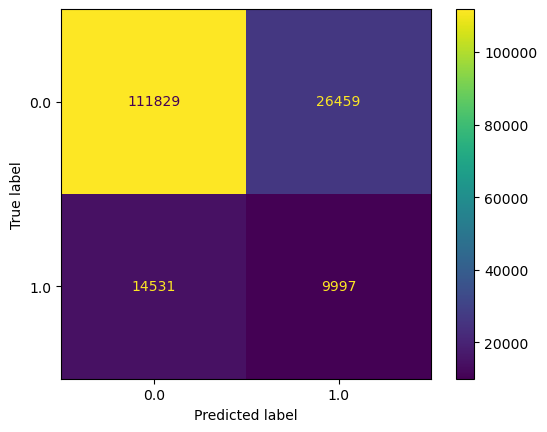

recall_score:  0.8767123287671232
precision_score:  0.1660450786443976
accuracy_score:  0.31808298938679247
f1:  0.2792092706203136


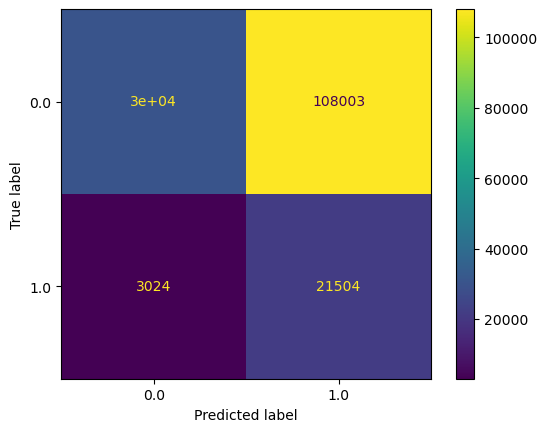

In [4]:
from sklearn import svm

for kernel in ("linear","rbf"):
    clf = svm.SVC(kernel=kernel, gamma=2)
    clf.fit(X_train, y_train)
    y_true =y_test
    y_pred = clf.predict(X_test)
    print('recall_score: ',recall_score(y_true, y_pred))
    print('precision_score: ',precision_score(y_true, y_pred))
    print('accuracy_score: ',accuracy_score(y_true, y_pred))
    print('f1: ',f1_score(y_true, y_pred))
    cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
    disp.plot()
    plt.show()

In [9]:
from visualize import *

the percentage of amd data, tha ended in the train set is 77.27272727272727
the percentage of control data, tha ended in the train set is 80.0
GROUP: amd


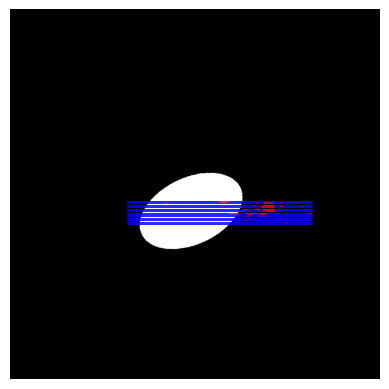

GROUP: amd


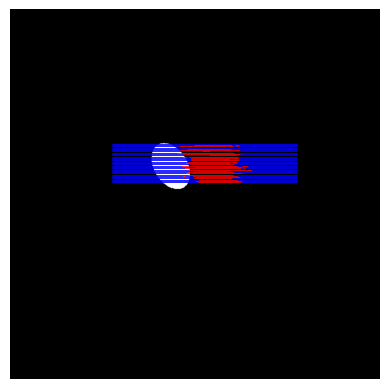

HERE


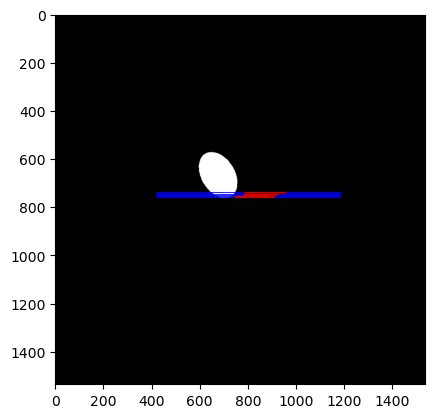

GROUP: amd


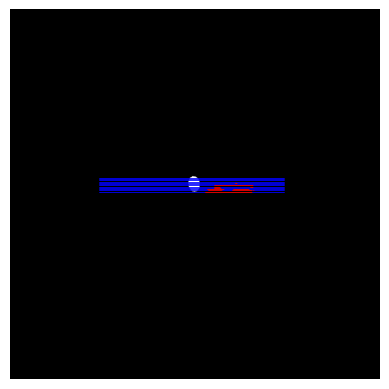

GROUP: amd


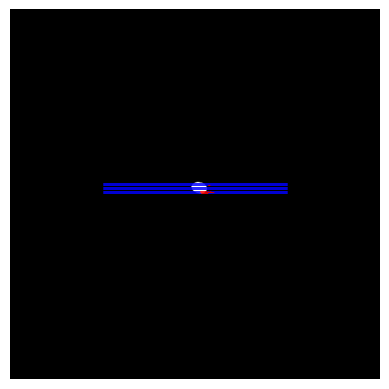

GROUP: amd


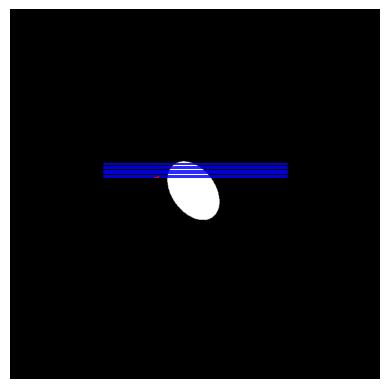

HERE


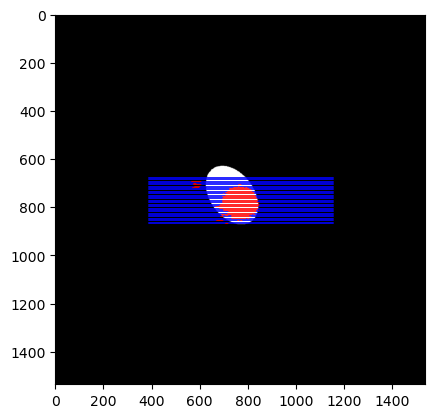

GROUP: control


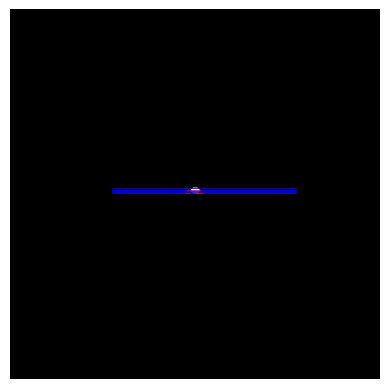

GROUP: control


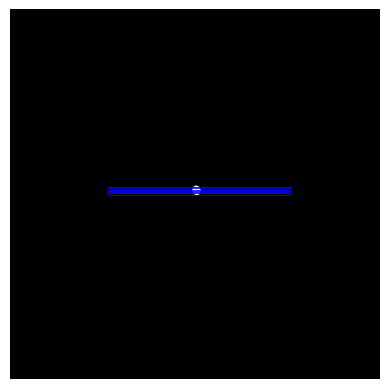

HERE


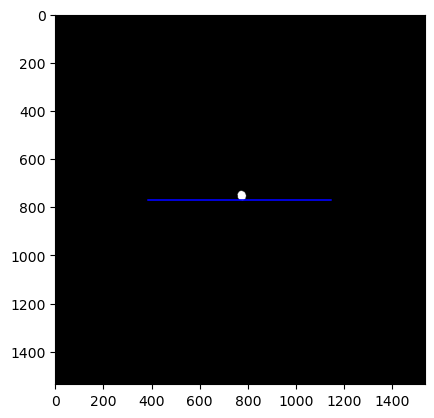

GROUP: control


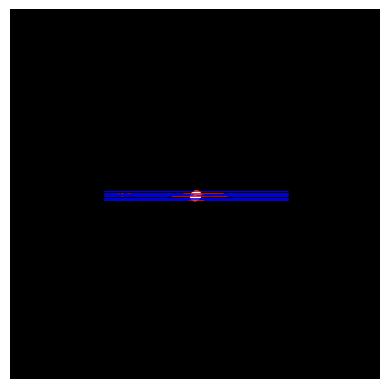

GROUP: control


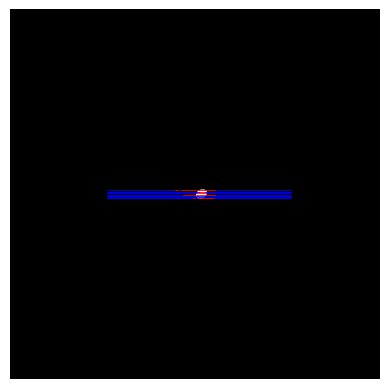

GROUP: control


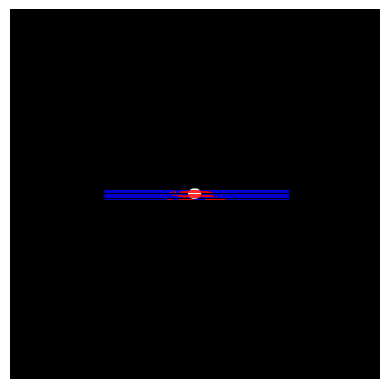

GROUP: control


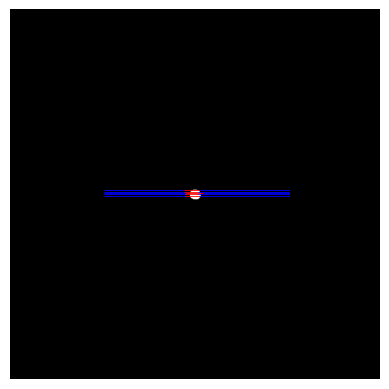

HERE


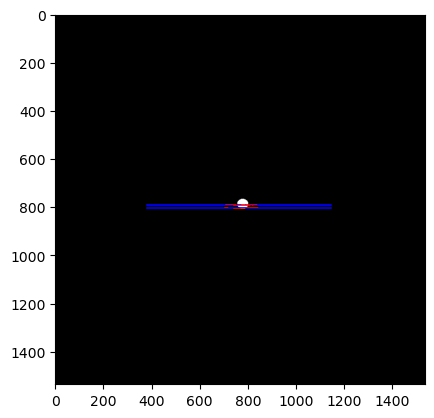

GROUP: control


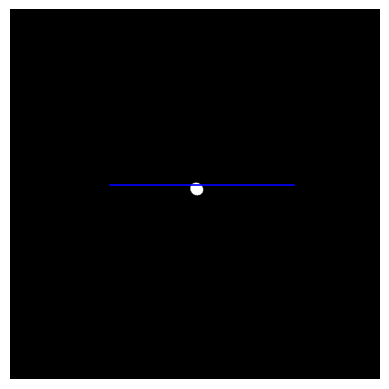

HERE


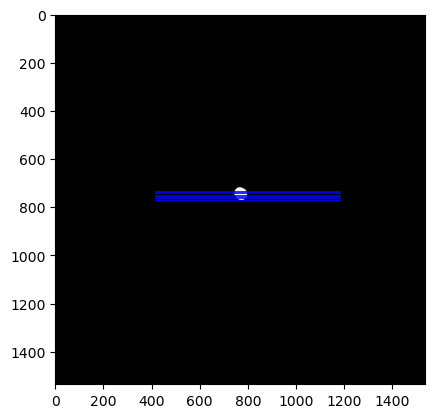

GROUP: control


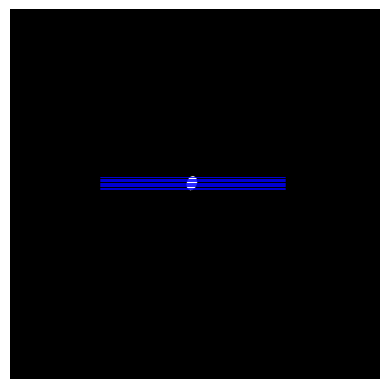

GROUP: control


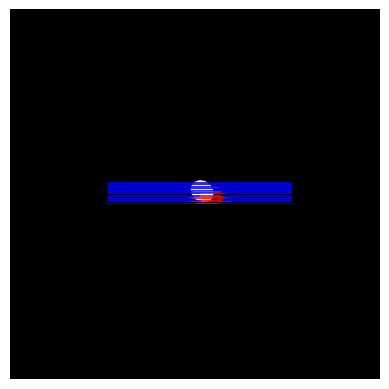

GROUP: control


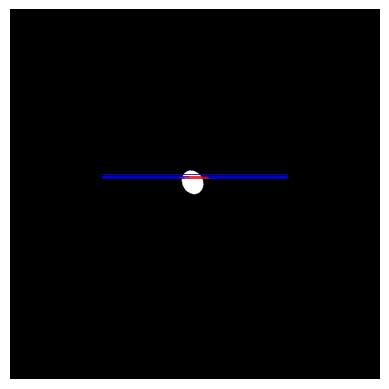

In [12]:
trainpaths,testpaths = train_test_path_split(root_path)
visualizePredictions(testpaths,'thickness',clf,rootpath = None,normmode = '')

# Provare a testare modelli senza class balancing

In [5]:
#on thicknesses data
save_dataset(root_path,mode ='thickness',normmode = '',samplingmode = '')
X_train, X_test, y_train, y_test = open_dataset(mode ='thickness',normmode = '',samplingmode = '')

In [7]:
print(np.unique(y_train, return_counts=True))
print(np.unique(y_test, return_counts=True))
print(168864/(407904 + 168864))
print(24528/(138288 + 24528))

(array([0., 1.]), array([407904, 168864], dtype=int64))
(array([0., 1.]), array([138288,  24528], dtype=int64))
0.2927762982689747
0.15064858490566038


C:\Users\line\.conda\envs\OCT\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


recall_score:  0.9963714938030006
precision_score:  0.15649272893761165
accuracy_score:  0.19039283608490565
f1:  0.27050001383546857


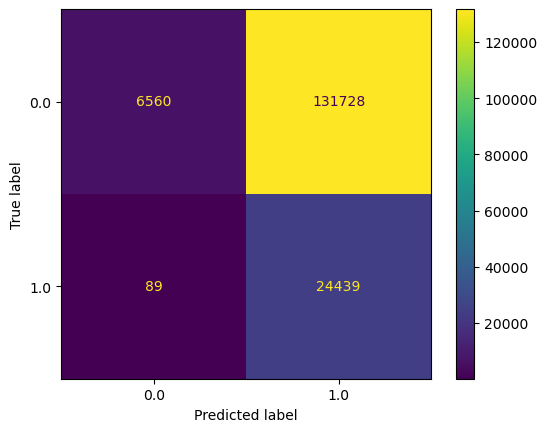

In [14]:
# SVM 
clf = make_pipeline(LinearSVC(random_state=0, tol=1e-5))
clf.fit(X_train, y_train)

y_true =y_test
y_pred = clf.predict(X_test)
print('recall_score: ',recall_score(y_true, y_pred))
print('precision_score: ',precision_score(y_true, y_pred))
print('accuracy_score: ',accuracy_score(y_true, y_pred))
print('f1: ',f1_score(y_true, y_pred))
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

In [4]:
#on raw data
save_dataset(root_path,mode ='raw',normmode = '',samplingmode = '')
X_train, X_test, y_train, y_test = open_dataset(mode ='raw',normmode = '',samplingmode = '')

the percentage of amd data, tha ended in the train set is 77.27272727272727
the percentage of control data, tha ended in the train set is 80.0
(576768, 144) (162816, 144) (576768,) (162816,)


C:\Users\line\.conda\envs\OCT\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


recall_score:  0.0839041095890411
precision_score:  0.6086956521739131
accuracy_score:  0.8538657134433962
f1:  0.1474793077501881


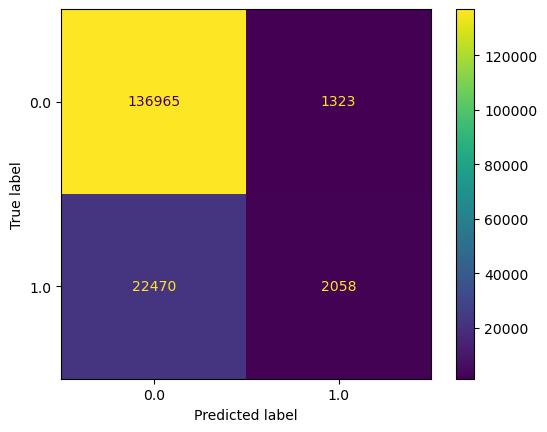

In [5]:
# SVM 
clf = make_pipeline(LinearSVC(random_state=0, tol=1e-5))
clf.fit(X_train, y_train)

y_true =y_test
y_pred = clf.predict(X_test)
print('recall_score: ',recall_score(y_true, y_pred))
print('precision_score: ',precision_score(y_true, y_pred))
print('accuracy_score: ',accuracy_score(y_true, y_pred))
print('f1: ',f1_score(y_true, y_pred))
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

Capire come funziona esattamente l’upsampling
 => utilizza sklearn.resample quindi fa dei sample del dataset con ripetizione fino a che non sono balanced
 => UNIT TESTING: use some simple cases to check correctness, (and that does what we think)
 

In [7]:
print(X_train.shape)
print(y_train.shape)

(576768, 144)
(576768,)


In [18]:
X = np.array([[1,1,1],[2,2,2],[3,3,3],[4,4,4],[5,5,5],[6,6,6],[7,7,7]])
print(X.shape)
y = np.array([0,0,0,0,1,1,1])
print(y.shape)

(7, 3)
(7,)


In [19]:
X,y = upsample(X,y)
print(X)
print(y)

7 3 4
(4, 3)
[[6 6 6]
 [7 7 7]
 [5 5 5]
 [7 7 7]
 [1 1 1]
 [2 2 2]
 [3 3 3]
 [4 4 4]]
[1 1 1 1 0 0 0 0]


Scoprire perché nella visualizzazione ci sono degli shift tra labels (label fundus e label OCT)
 => Perché le immagini oct hanno dei fundus diversi anche se fanno parte dello stesso occhio

Provare a fare training solo su dati di sani per vedere se la perfomance aumenta (e stessa cosa per i AMD)
 => Capire se é quello il motivo dell'overestimation nei control

In [13]:
#SOLO SANI THICKNESS
save_dataset(root_path,mode ='thickness',normmode = '', samplingmode = 'U',onlyCtrl = True,onlyAMD = False)
X_train, X_test, y_train, y_test = open_dataset(mode ='thickness',normmode = '', samplingmode = 'U',onlyCtrl = True,onlyAMD = False)

the percentage of amd data, tha ended in the train set is 77.27272727272727
the percentage of control data, tha ended in the train set is 80.0
(265728, 5) (66816, 5) (265728,) (66816,)
UPSAMPLING
265728 40152 225576
(225576, 5)


In [14]:
print(np.unique(y_train, return_counts=True))
print(np.unique(y_test, return_counts=True))



(array([0., 1.]), array([225576, 225576], dtype=int64))
(array([0., 1.]), array([62827,  3989], dtype=int64))


C:\Users\line\.conda\envs\OCT\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


recall_score:  0.9305590373527199
precision_score:  0.05746130030959752
accuracy_score:  0.08457555076628352
f1:  0.10823893044074122


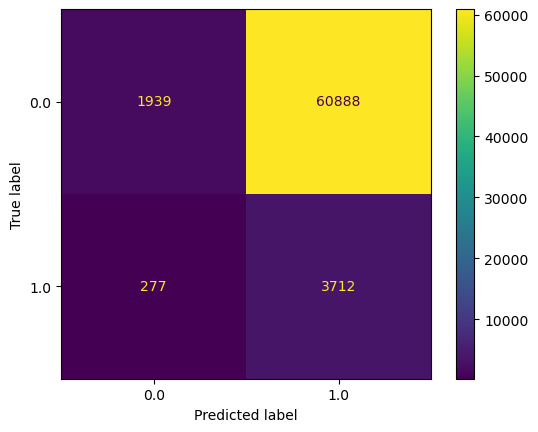

In [6]:
# SVM 
clf2 = make_pipeline(LinearSVC(random_state=0, tol=1e-5))
clf2.fit(X_train, y_train)

y_true =y_test
y_pred = clf2.predict(X_test)
print('recall_score: ',recall_score(y_true, y_pred))
print('precision_score: ',precision_score(y_true, y_pred))
print('accuracy_score: ',accuracy_score(y_true, y_pred))
print('f1: ',f1_score(y_true, y_pred))
cm = confusion_matrix(y_test, y_pred, labels=clf2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf2.classes_)
disp.plot()
plt.show()

In [3]:
#SOLO SANI RAW DATA
save_dataset(root_path,mode ='raw',normmode = 'Z-score', samplingmode = 'U',onlyCtrl = True,onlyAMD = False)
X_train, X_test, y_train, y_test = open_dataset(mode ='raw',normmode = 'Z-score', samplingmode = 'U',onlyCtrl = True,onlyAMD = False)

the percentage of amd data, tha ended in the train set is 77.27272727272727
the percentage of control data, tha ended in the train set is 80.0
(265728, 144) (66816, 144) (265728,) (66816,)
UPSAMPLING
265728 40152 225576
(225576, 144)


C:\Users\line\.conda\envs\OCT\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


recall_score:  0.9799448483329155
precision_score:  0.17849315068493152
accuracy_score:  0.7295408285440613
f1:  0.30198153655992893


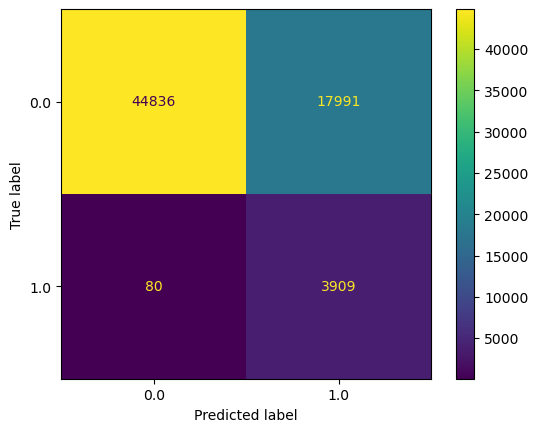

In [8]:
# SVM 
clf3 = make_pipeline(LinearSVC(random_state=0, tol=1e-5))
clf3.fit(X_train, y_train)

y_true =y_test
y_pred = clf3.predict(X_test)
print('recall_score: ',recall_score(y_true, y_pred))
print('precision_score: ',precision_score(y_true, y_pred))
print('accuracy_score: ',accuracy_score(y_true, y_pred))
print('f1: ',f1_score(y_true, y_pred))
cm = confusion_matrix(y_test, y_pred, labels=clf3.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf3.classes_)
disp.plot()
plt.show()

In [10]:
len(y_test)

66816

In [11]:
len(y_train)

451152

In [7]:
print(np.unique(y_train, return_counts=True))
print(np.unique(y_test, return_counts=True))

(array([0., 1.]), array([225576, 225576], dtype=int64))
(array([0., 1.]), array([62827,  3989], dtype=int64))


recall_score:  0.6436012696386141
precision_score:  0.8167431760390648
accuracy_score:  0.7495965882895343
f1:  0.7199081649856695


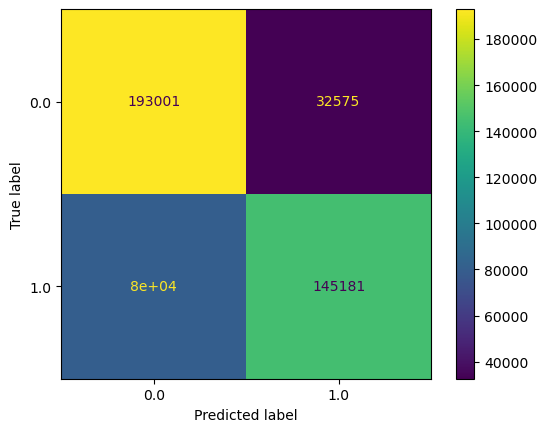

TEST -----------------------------------
recall_score:  0.9969917272499373
precision_score:  0.2217451909673822
accuracy_score:  0.7909183429118773
f1:  0.3627987593504835


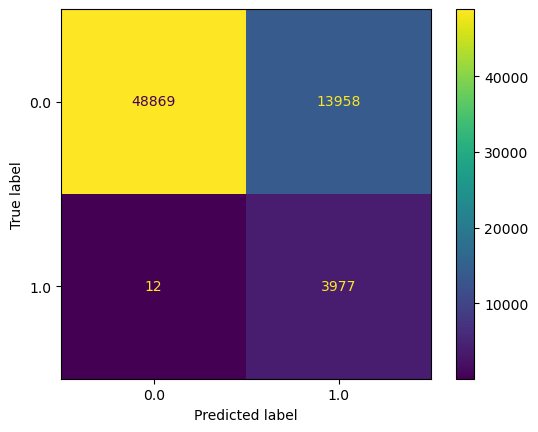

In [12]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_true =y_train
#y_pred = clf.predict(X_test1)
y_pred = (clf.predict_proba(X_train)[:,1] >= 0.5).astype(bool) 
print('recall_score: ',recall_score(y_true, y_pred))
print('precision_score: ',precision_score(y_true, y_pred))
print('accuracy_score: ',accuracy_score(y_true, y_pred))
print('f1: ',f1_score(y_true, y_pred))

cm = confusion_matrix(y_true, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()
print('TEST -----------------------------------')
y_true = y_test
y_pred = (clf.predict_proba(X_test)[:,1] >= 0.5).astype(bool) 
print('recall_score: ',recall_score(y_true, y_pred))
print('precision_score: ',precision_score(y_true, y_pred))
print('accuracy_score: ',accuracy_score(y_true, y_pred))
print('f1: ',f1_score(y_true, y_pred))

cm = confusion_matrix(y_true, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

In [82]:
noise = np.random.normal(0, .1, X_train5.shape)
print((X_train5 == 0).sum())
print((X_train5 != 0).sum())

13595136
24669696


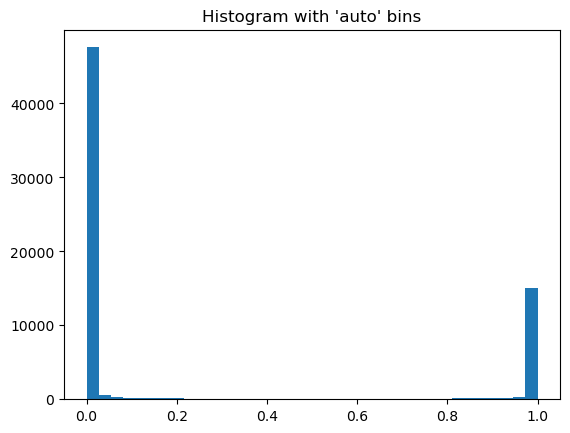

In [54]:
plt.hist(clf.predict_proba(X_test5)[:,1], bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

recall_score:  0.8967159689145149
precision_score:  0.38437567160971414
accuracy_score:  0.9080908764367817
f1:  0.538097028958255


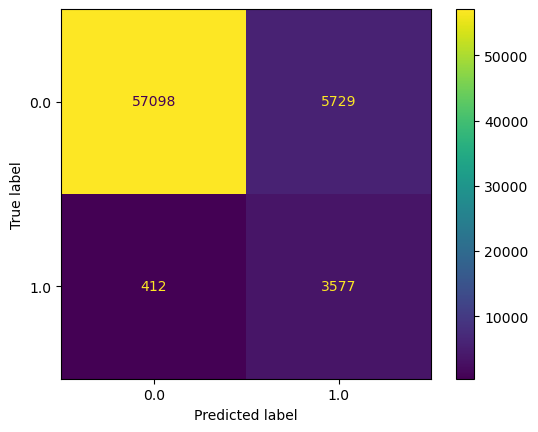

In [55]:
clf = GaussianNB()
clf.fit(X_train5[::15], y_train5[::15])
y_true =y_test5
#y_pred = clf.predict(X_test1)
y_pred = (clf.predict_proba(X_test5)[:,1] >= 1).astype(bool) 
print('recall_score: ',recall_score(y_true, y_pred))
print('precision_score: ',precision_score(y_true, y_pred))
print('accuracy_score: ',accuracy_score(y_true, y_pred))
print('f1: ',f1_score(y_true, y_pred))

cm = confusion_matrix(y_true, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

recall_score:  0.8947104537478064
precision_score:  0.3881457313757477
accuracy_score:  0.9095126915708812
f1:  0.5414138349514565


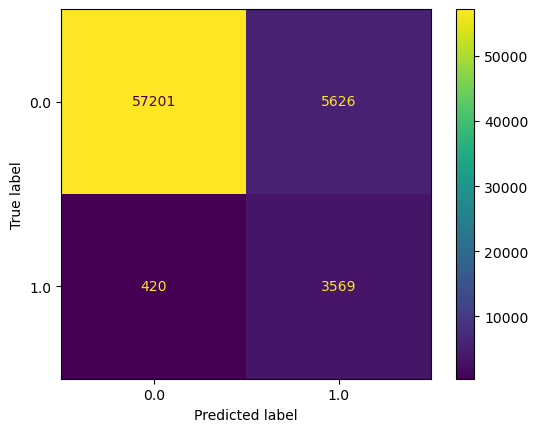

In [58]:
clf = GaussianNB()
clf.fit(X_train5[::100], y_train5[::100])
y_true =y_test5
#y_pred = clf.predict(X_test1)
y_pred = (clf.predict_proba(X_test5)[:,1] >= 1).astype(bool) 
print('recall_score: ',recall_score(y_true, y_pred))
print('precision_score: ',precision_score(y_true, y_pred))
print('accuracy_score: ',accuracy_score(y_true, y_pred))
print('f1: ',f1_score(y_true, y_pred))

cm = confusion_matrix(y_true, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

recall_score:  0.5753424657534246
precision_score:  0.44680851063829785
accuracy_score:  0.8439849624060151
f1:  0.5029940119760479


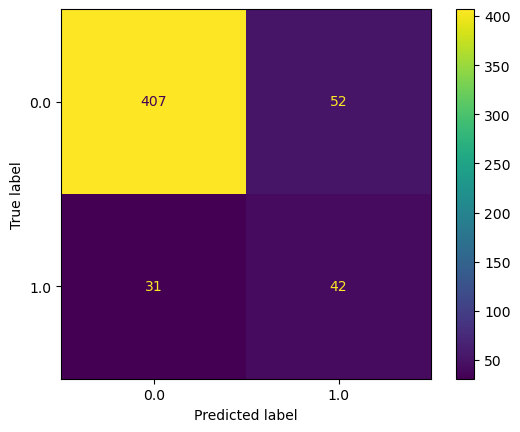

In [72]:
clf = GaussianNB()
clf.fit(X_train5[::500], y_train5[::500])
y_true =y_train5[::500]
#y_pred = clf.predict(X_test1)
y_pred = (clf.predict_proba(X_train5[::500])[:,1] >= 0.7).astype(bool) 
print('recall_score: ',recall_score(y_true, y_pred))
print('precision_score: ',precision_score(y_true, y_pred))
print('accuracy_score: ',accuracy_score(y_true, y_pred))
print('f1: ',f1_score(y_true, y_pred))

cm = confusion_matrix(y_true, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

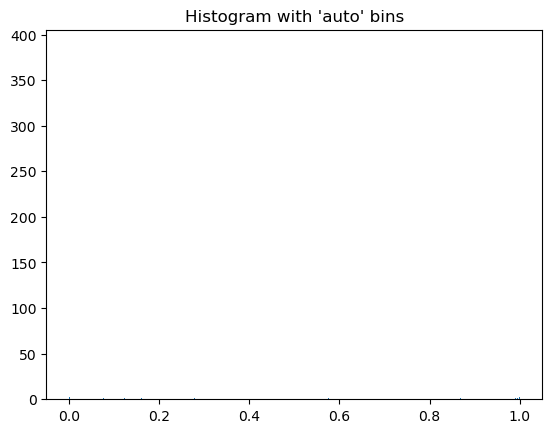

In [76]:
plt.hist(clf.predict_proba(X_train5[::500])[:,1], bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()
# clf.predict_proba(X_train5[::500])[:,1]

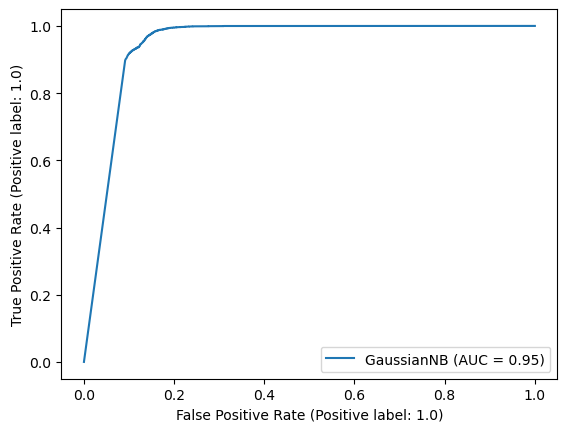

In [44]:
from sklearn.datasets import make_classification
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
clf = GaussianNB()
clf.fit(X_train5, y_train5)
RocCurveDisplay.from_estimator(
   clf, X_test5, y_test5)

plt.show()

In [45]:
print(np.unique(y_test5, return_counts=True))

(array([0., 1.]), array([62827,  3989], dtype=int64))


66816 3989 62827
(62827, 144)
(array([0., 1.]), array([62827, 62827], dtype=int64))


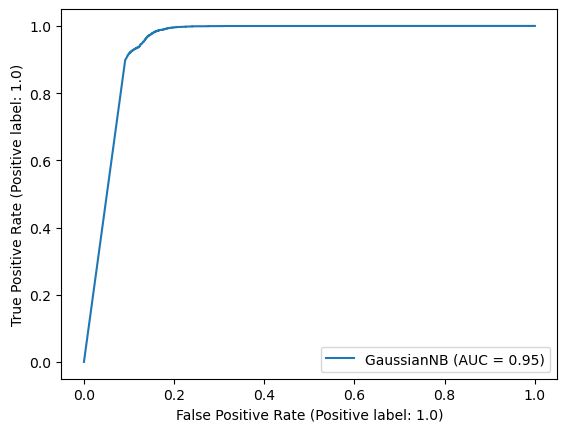

In [48]:
Xutest,yutest = upsample(X_test5, y_test5)
print(np.unique(yutest, return_counts=True))
RocCurveDisplay.from_estimator(
   clf,Xutest,yutest)

plt.show()

In [34]:
save_dataset(root_path,mode ='raw',normmode = 'Z-score', samplingmode = '',onlyCtrl = True,onlyAMD = False)
X_train5, X_test5, y_train5, y_test5 = open_dataset(mode ='raw',normmode = 'Z-score', samplingmode = '',onlyCtrl = True,onlyAMD = False)
print(np.unique(y_train5, return_counts=True))
print(np.unique(y_test5, return_counts=True))

the percentage of amd data, tha ended in the train set is 77.27272727272727
the percentage of control data, tha ended in the train set is 80.0
(265728, 144) (66816, 144) (265728,) (66816,)
(array([0., 1.]), array([225576,  40152], dtype=int64))
(array([0., 1.]), array([62827,  3989], dtype=int64))


In [16]:
#SOLO SANI RAW DATA
X_train1, X_test1, y_train1, y_test1 = open_dataset(mode ='raw',normmode = 'Z-score', samplingmode = 'U',onlyCtrl = True,onlyAMD = False)
X_train2, X_test2, y_train2, y_test2 = open_dataset(mode ='raw',normmode = 'Z-score', samplingmode = 'U',onlyCtrl = False,onlyAMD = False)


print(X_train2.shape, X_train1.shape)
print(y_train2.shape, y_train1.shape)

(897504, 144) (451152, 144)
(897504,) (451152,)


recall_score:  0.9110052644773126
precision_score:  0.37444616177228235
accuracy_score:  0.9038254310344828
f1:  0.530743391266248


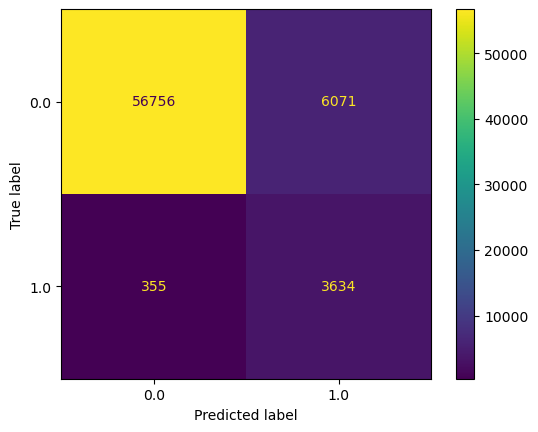

In [42]:
clf = GaussianNB()
clf.fit(X_train1, y_train1)
y_true =y_test1
#y_pred = clf.predict(X_test1)
y_pred = (clf.predict_proba(X_test1)[:,1] >= 1).astype(bool) 
print('recall_score: ',recall_score(y_true, y_pred))
print('precision_score: ',precision_score(y_true, y_pred))
print('accuracy_score: ',accuracy_score(y_true, y_pred))
print('f1: ',f1_score(y_true, y_pred))

cm = confusion_matrix(y_true, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

recall_score:  0.9110052644773126
precision_score:  0.37444616177228235
accuracy_score:  0.9038254310344828
f1:  0.530743391266248


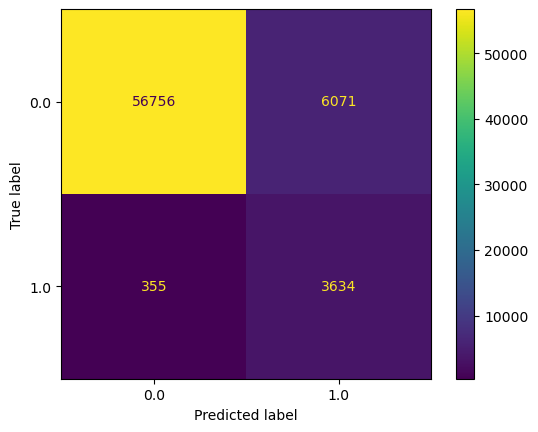

In [38]:
clf = GaussianNB()
clf.fit(X_train1, y_train1)
y_true =y_test1
# y_pred = clf.predict(X_test1)
y_pred = (clf.predict_proba(X_test1)[:,1] >= 1).astype(bool) 
print('recall_score: ',recall_score(y_true, y_pred))
print('precision_score: ',precision_score(y_true, y_pred))
print('accuracy_score: ',accuracy_score(y_true, y_pred))
print('f1: ',f1_score(y_true, y_pred))

cm = confusion_matrix(y_true, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

the percentage of amd data, tha ended in the train set is 77.27272727272727
the percentage of control data, tha ended in the train set is 80.0
GROUP: control


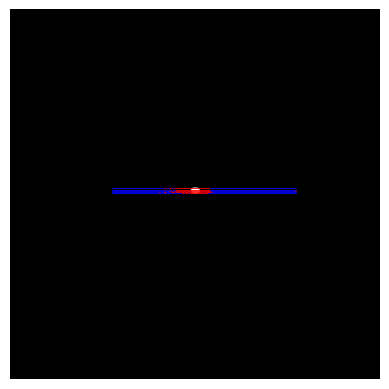

GROUP: control


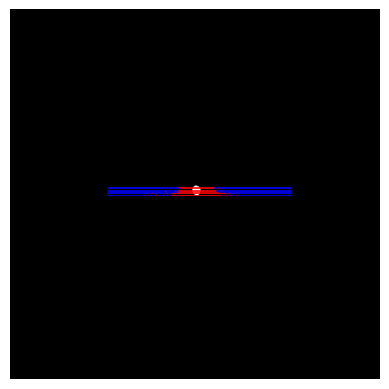

HERE


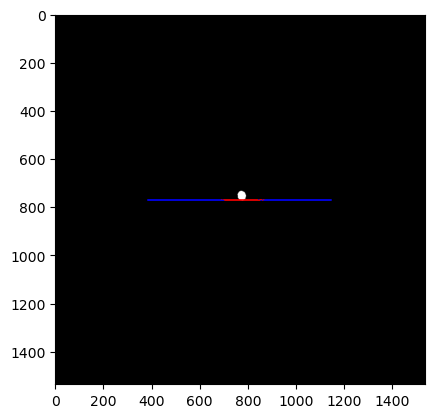

GROUP: control


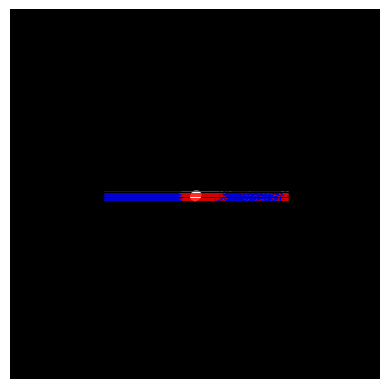

GROUP: control


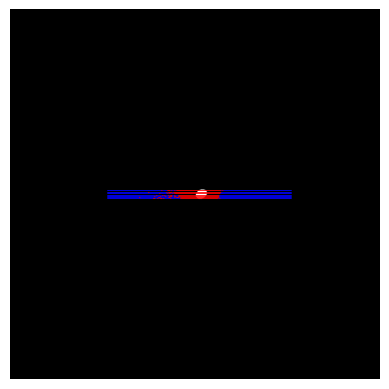

GROUP: control


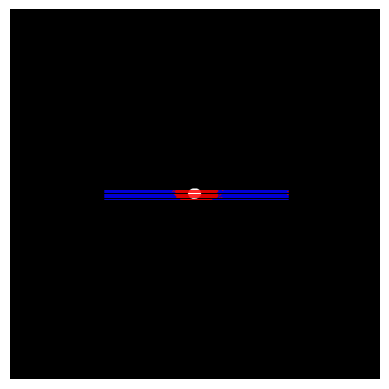

GROUP: control


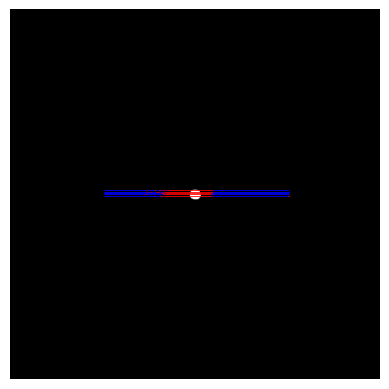

HERE


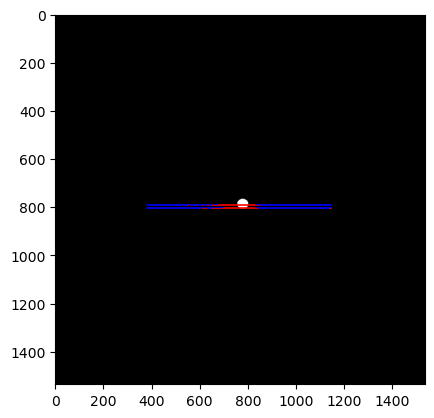

GROUP: control


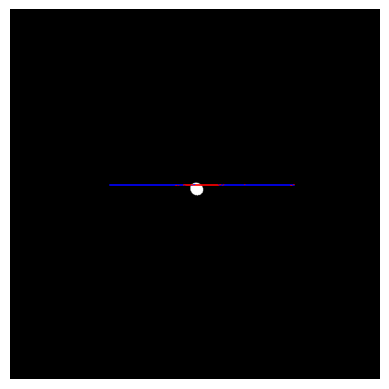

HERE


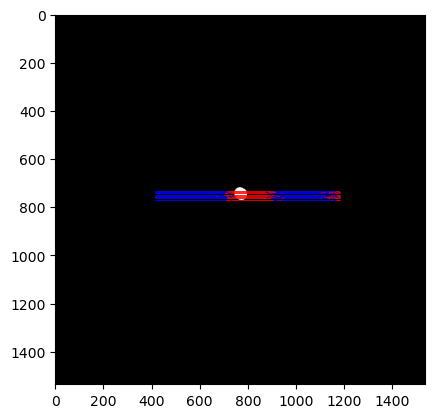

GROUP: control


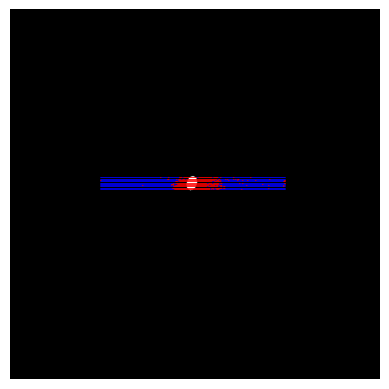

GROUP: control


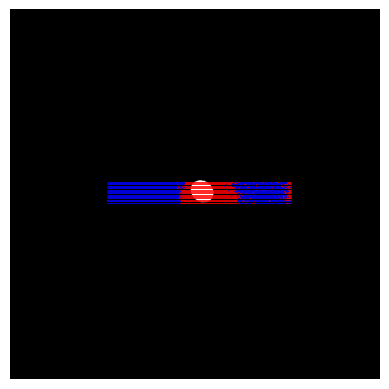

GROUP: control


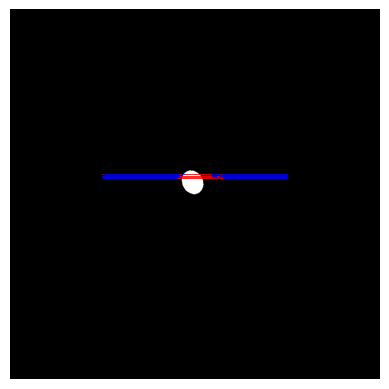

In [30]:
from visualize import *
root_path =      DATAPATHS["preprocessed"]

trainpaths,testpaths = train_test_path_split(root_path)
testpaths = [i for i in testpaths if ('control') in i]
visualizePredictions(testpaths,'raw',clf, rootpath = root_path,normmode = 'Z-score')

the percentage of amd data, tha ended in the train set is 77.27272727272727
the percentage of control data, tha ended in the train set is 80.0
GROUP: control


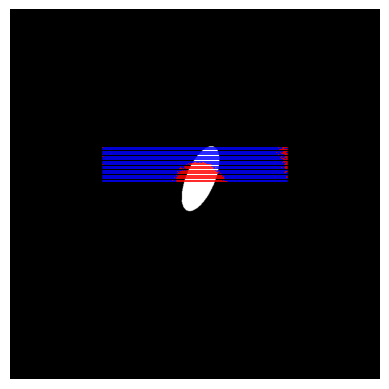

HERE


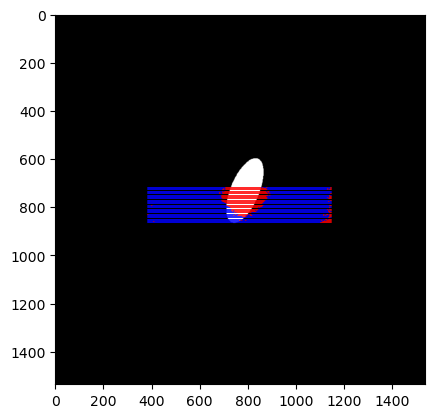

GROUP: control


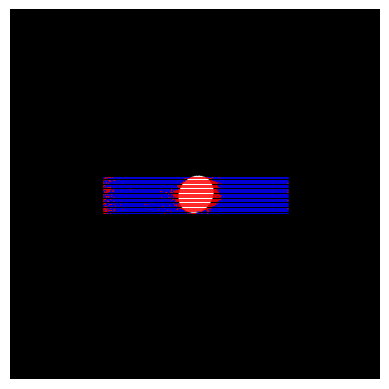

GROUP: control


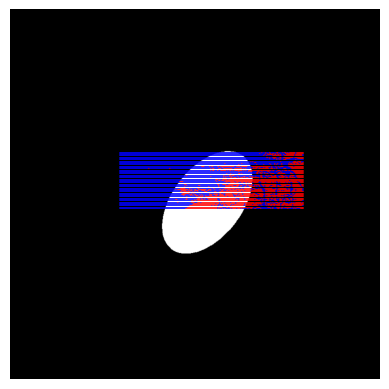

HERE


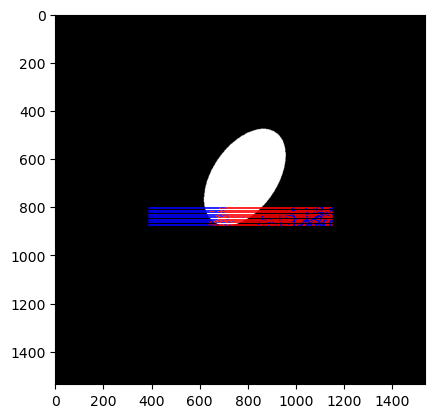

GROUP: control


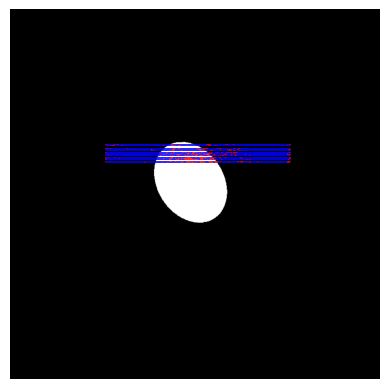

GROUP: control


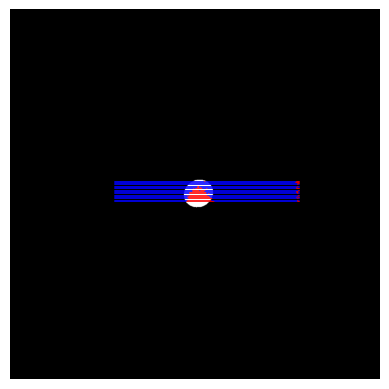

HERE


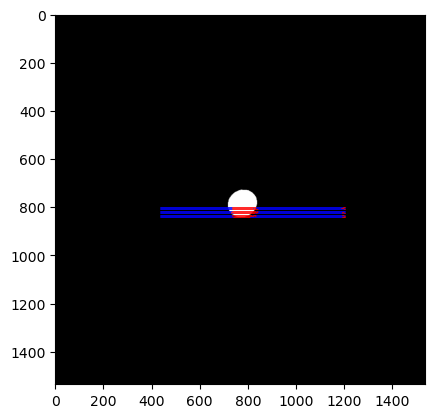

GROUP: control


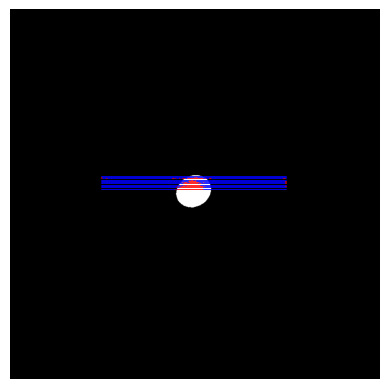

HERE


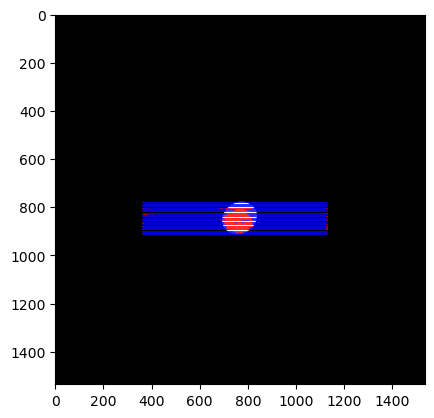

GROUP: control


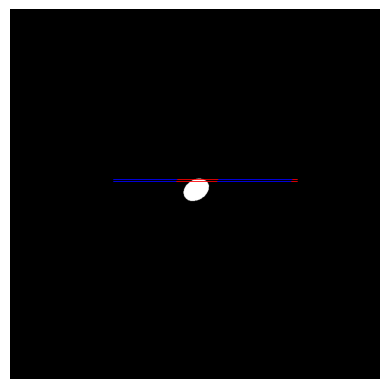

HERE


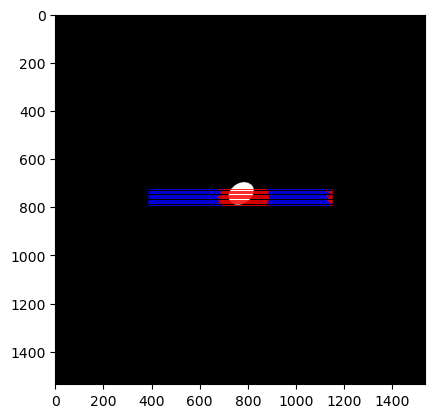

GROUP: control


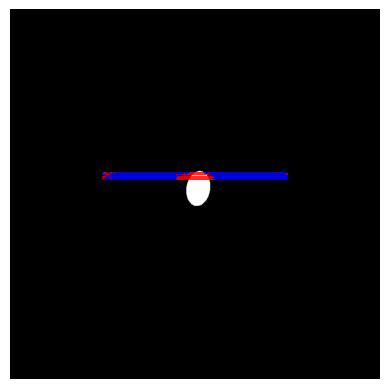

HERE


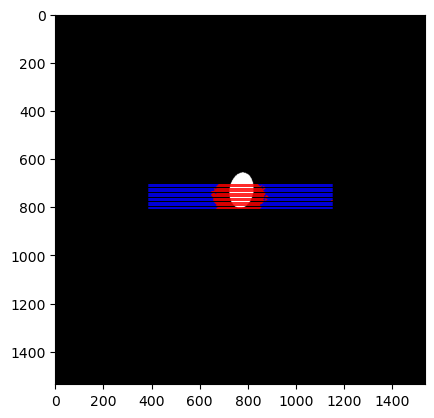

GROUP: control


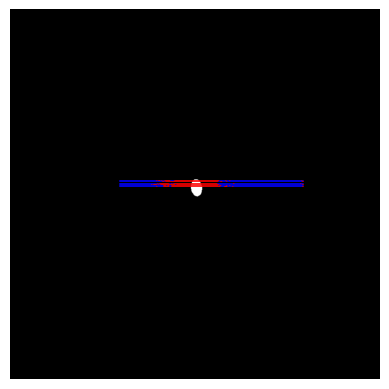

HERE


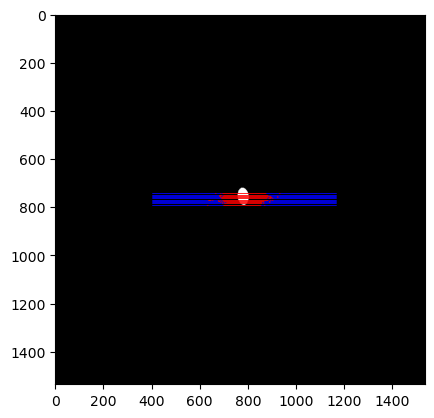

GROUP: control


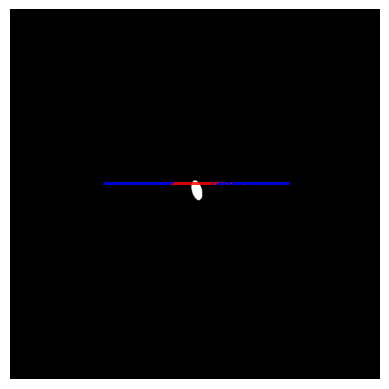

HERE


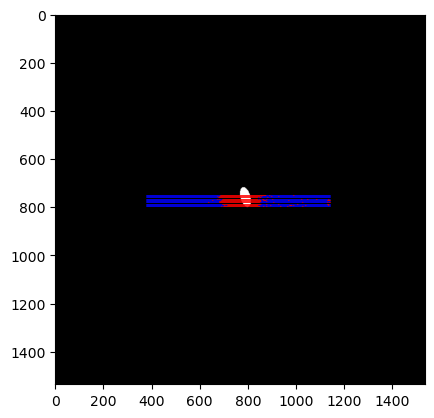

GROUP: control


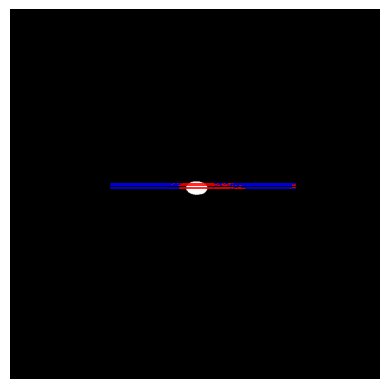

HERE


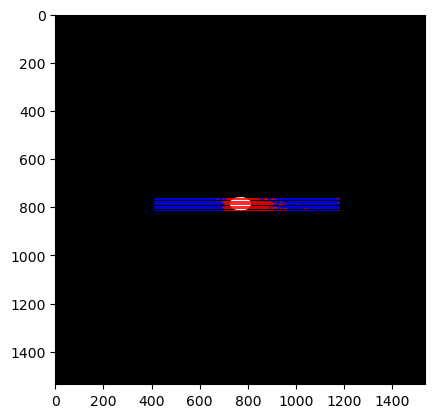

GROUP: control


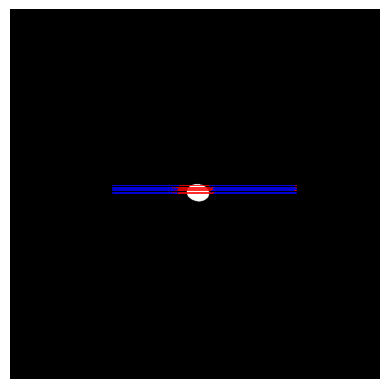

HERE


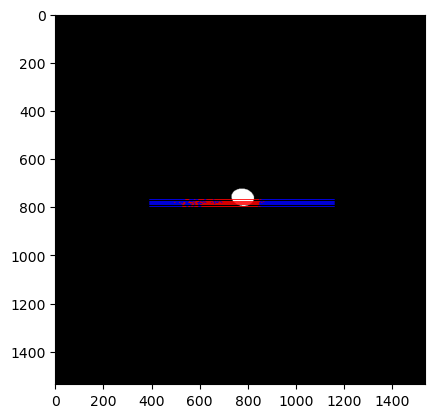

GROUP: control


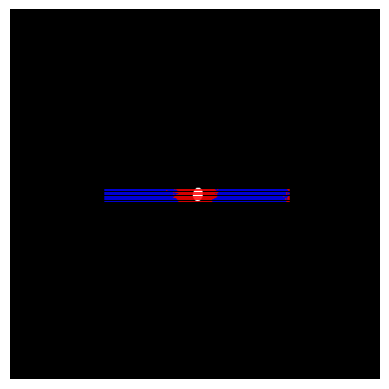

GROUP: control


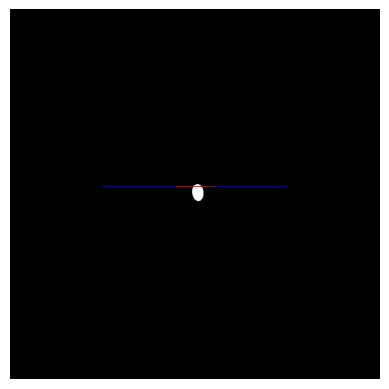

HERE


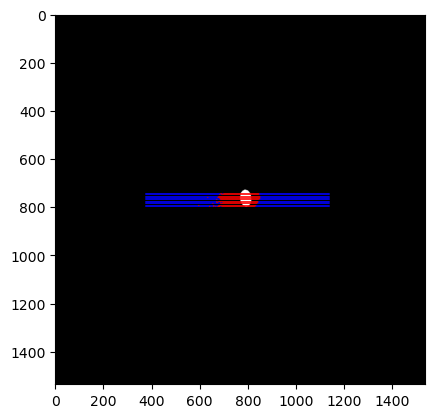

GROUP: control


IndexError: list index out of range

In [15]:
from visualize import *
root_path =      DATAPATHS["preprocessed"]

trainpaths,testpaths = train_test_path_split(root_path)
trainpaths = [i for i in trainpaths if ('control') in i]
visualizePredictions(trainpaths,'raw',clf, rootpath = root_path,normmode = 'Z-score')

(71424,) (71424,)
recall_score:  0.2443192258222576
precision_score:  0.6089146695161044
accuracy_score:  0.7913866487455197
f1:  0.3487192936445493


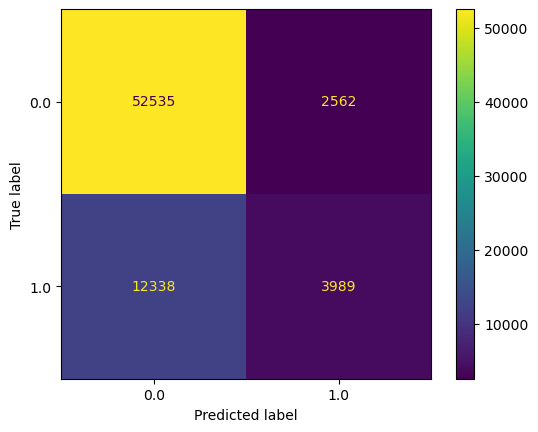

In [9]:
clf = GaussianNB()
clf.fit(X_train2, y_train2)
y_true =y_test2
y_pred = clf.predict(X_test2)
print(y_pred.shape,y_true.shape)
print('recall_score: ',recall_score(y_true, y_pred))
print('precision_score: ',precision_score(y_true, y_pred))
print('accuracy_score: ',accuracy_score(y_true, y_pred))
print('f1: ',f1_score(y_true, y_pred))

cm = confusion_matrix(y_true, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

In [10]:
print(X_test2.shape)
print(y_test2.shape)

(71424, 144)
(71424,)


the percentage of amd data, tha ended in the train set is 77.27272727272727
the percentage of control data, tha ended in the train set is 80.0
GROUP: amd


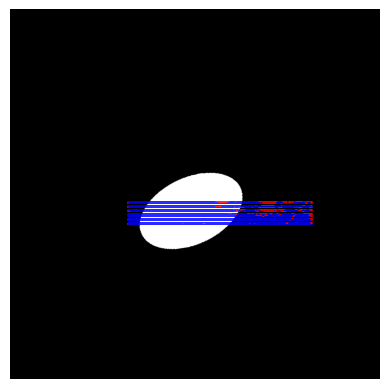

GROUP: amd


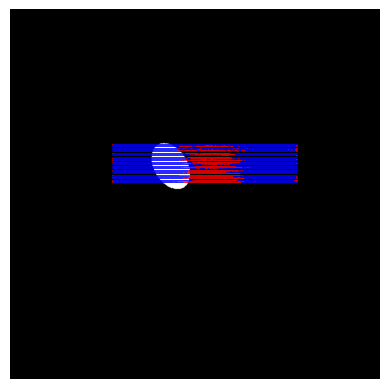

HERE


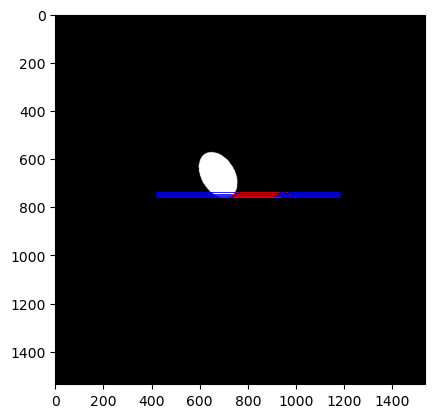

GROUP: amd


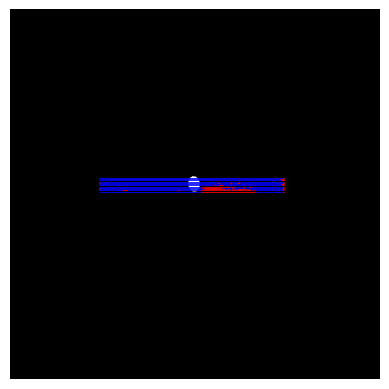

GROUP: amd


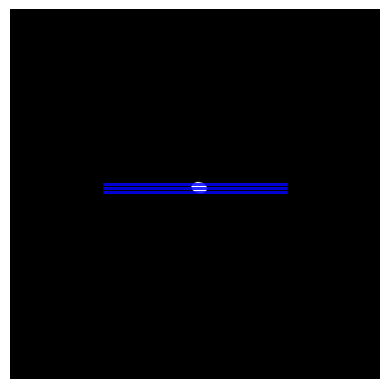

GROUP: amd


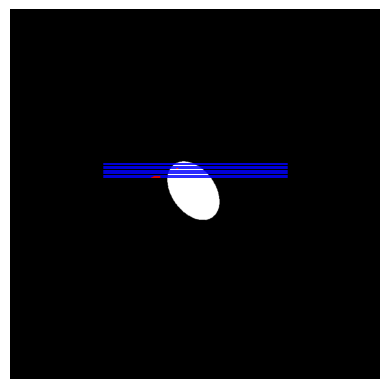

HERE


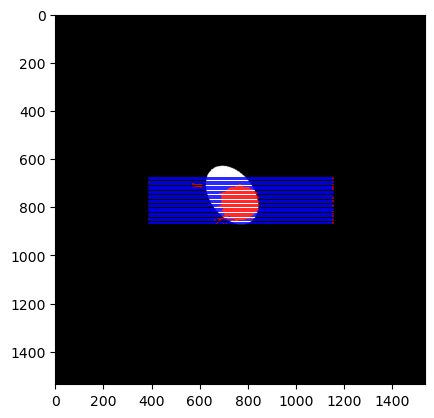

GROUP: control


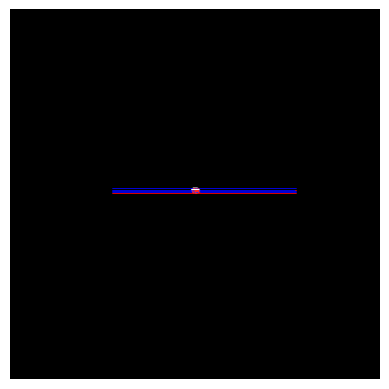

GROUP: control


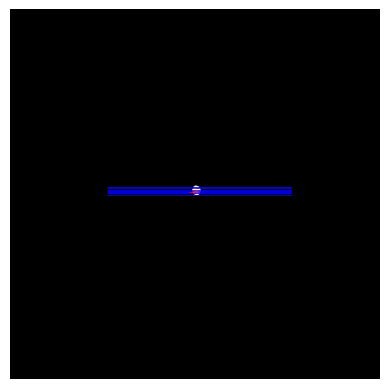

HERE


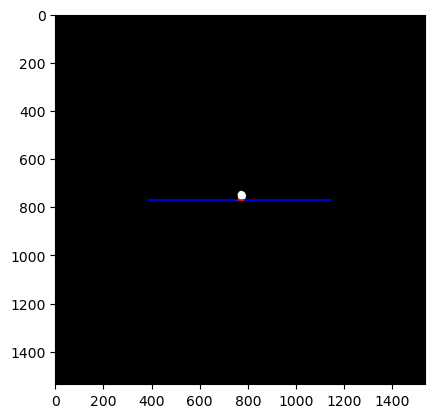

GROUP: control


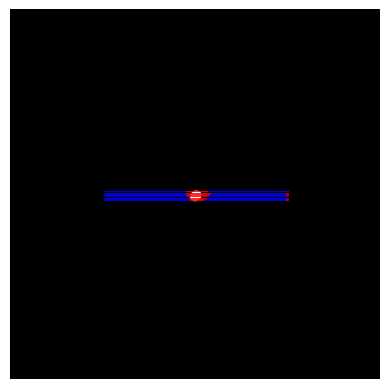

GROUP: control


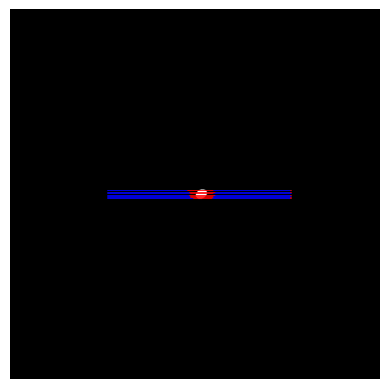

GROUP: control


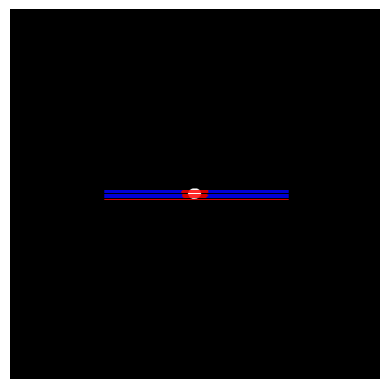

GROUP: control


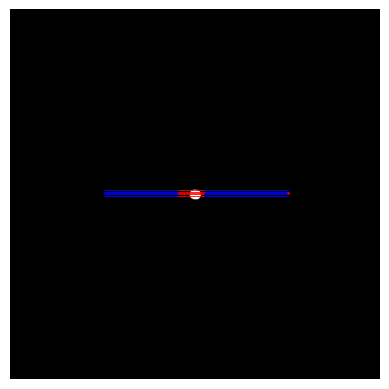

HERE


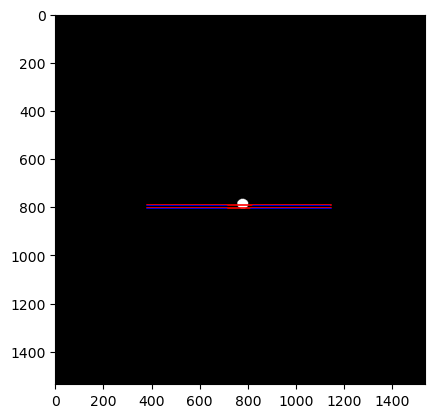

GROUP: control


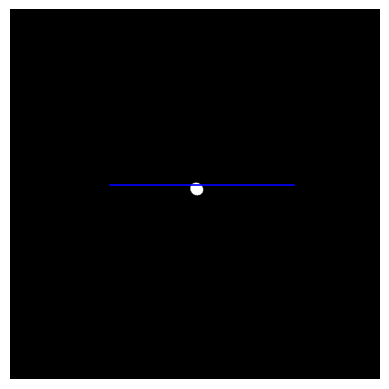

HERE


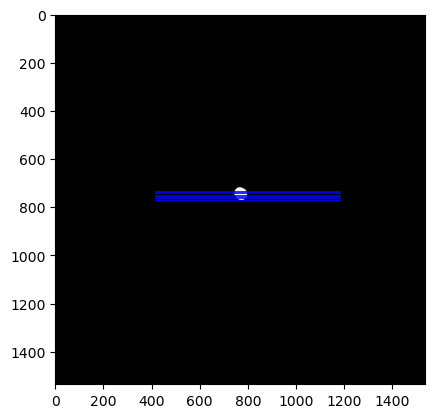

GROUP: control


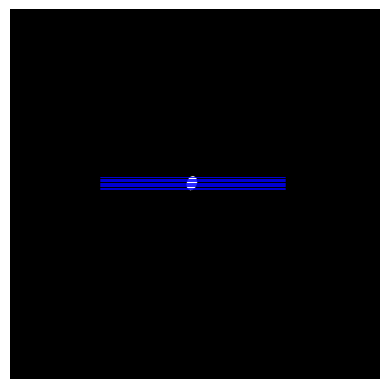

GROUP: control


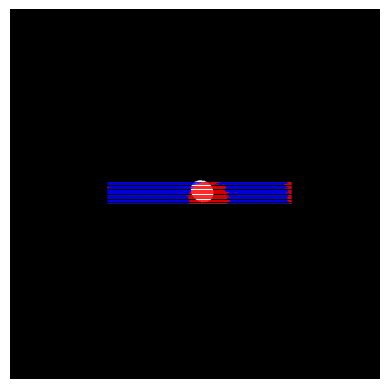

GROUP: control


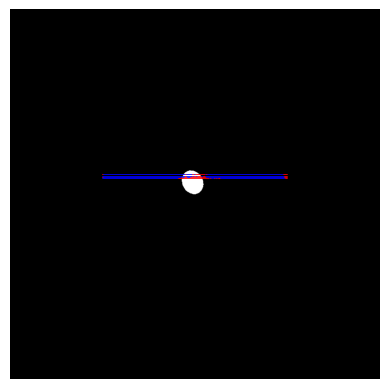

In [12]:
root_path =      DATAPATHS["preprocessed"]

trainpaths,testpaths = train_test_path_split(root_path)
visualizePredictions(testpaths,'raw',clf, rootpath = root_path,normmode = 'Z-score')

# ESPLORIAMO LA DISTRIBUZIONE DI N OCT PER PATZIENTE

In [7]:
import random
def train_test_path_split(root_path,p = 0.8):
    def keep_good_segmentation(PPocts):
        filtered = []
        for PPoct in PPocts:
            if PPoct.image().shape[0] < 120:
                filtered.append(PPoct)
        return filtered

       
    paths =  glob.glob(os.path.join(root_path + '\*.pickle'))
    paths_amd = []
    paths_control = []
    num_amd = []
    num_control = []
    rateoAmd = []
    rateoControl = []
    total_amd = 0
    total_control = 0
    iterator = iter(range(0,len(paths)))
    AMDtwoEyesSamePatient = []
    CtrltwoEyesSamePatient = []

    
    for i in iterator:
        group = paths[i].split("\\").pop().split("_")[0]
        # Check if the two next paths are of the same patient (left and right eye), if the case we treat them as one
        two_eyes_same_patient = paths[i].split("\\")[-1].split("_")[:-1]==paths[i+1].split("\\")[-1].split("_")[:-1]
        if(two_eyes_same_patient):
            if group == 'amd':
                AMDtwoEyesSamePatient.append((len(keep_good_segmentation(pd.read_pickle(paths[i]))),len(keep_good_segmentation(pd.read_pickle(paths[i + 1])))))
            else:
                CtrltwoEyesSamePatient.append((len(keep_good_segmentation(pd.read_pickle(paths[i]))),len(keep_good_segmentation(pd.read_pickle(paths[i + 1])))))
            PPocts = keep_good_segmentation(pd.read_pickle(paths[i]) + pd.read_pickle(paths[i + 1]))
            path = paths[i] + '+' + paths[i+1]
            next(iterator, None)

        else:
            PPocts =keep_good_segmentation(pd.read_pickle(paths[i]))
            path = paths[i]
        print(i,path,len(pd.read_pickle(paths[i])),len(pd.read_pickle(paths[i + 1])) )
        num_octs = len(PPocts)
        rateos = [np.sum(PPoct.label())/(PPoct.label().shape[0]) for PPoct in PPocts]
        rateo = np.mean(rateos)
        if (group == 'amd'):
            paths_amd.append(path)
            num_amd.append(num_octs)
            total_amd += num_octs
            rateoAmd.append(rateo) 
        elif (group == 'control'):
            paths_control.append(path)
            num_control.append(num_octs)
            total_control += num_octs
            rateoControl.append(rateo) 
    print(f'the paths cntrl are: {paths_control[4]} with associated nocts{num_control}, the paths amd are: with associated nocts{num_amd}')
    print(f'the rateos for control are {rateoControl} and for amd are {rateoAmd}')
    print(f'the pairs are for control {CtrltwoEyesSamePatient} , for AMD {AMDtwoEyesSamePatient}')

train_test_path_split(root_path,p = 0.8)

0 C:\Users\line\Desktop\Mauro\preprocessing\preprocessed_octs\amd_0_left.pickle+C:\Users\line\Desktop\Mauro\preprocessing\preprocessed_octs\amd_0_right.pickle 9 49
2 C:\Users\line\Desktop\Mauro\preprocessing\preprocessed_octs\amd_1_left.pickle+C:\Users\line\Desktop\Mauro\preprocessing\preprocessed_octs\amd_1_right.pickle 36 12
4 C:\Users\line\Desktop\Mauro\preprocessing\preprocessed_octs\amd_2_left.pickle+C:\Users\line\Desktop\Mauro\preprocessing\preprocessed_octs\amd_2_right.pickle 27 68
6 C:\Users\line\Desktop\Mauro\preprocessing\preprocessed_octs\amd_3_left.pickle+C:\Users\line\Desktop\Mauro\preprocessing\preprocessed_octs\amd_3_right.pickle 45 62
8 C:\Users\line\Desktop\Mauro\preprocessing\preprocessed_octs\amd_4_left.pickle+C:\Users\line\Desktop\Mauro\preprocessing\preprocessed_octs\amd_4_right.pickle 22 38
10 C:\Users\line\Desktop\Mauro\preprocessing\preprocessed_octs\amd_5_left.pickle 19 97
11 C:\Users\line\Desktop\Mauro\preprocessing\preprocessed_octs\amd_6_left.pickle+C:\Users

In [ ]:
SANI = [74, 29, 15, 14, 2, 42, 20, 22, 28, 21, 86, 17, 63]
MALATI = [58, 48, 95, 107, 60, 19, 163]
RateoSani = [0.30310388513513514, 0.04660560344827587, 0.04939236111111111, 0.037109375, 0.05924479166666667, 0.10109747023809526, 0.05078125, 0.047407670454545456, 0.09626116071428573, 0.09530009920634919, 0.13802083333333331, 0.05392156862745098, 0.1353546626984127]
RateoMalati = [0.1896551724137931, 0.12754991319444445, 0.30563322368421053, 0.31891306464174457, 0.30755208333333334, 0.506373355263158, 0.5652319785276073]

print(np.sum(SANI))
print(np.sum(MALATI))

In [14]:
newCtr =  [sano if sano <= 14 else 14 for sano in SANI]
newAmd =  [amd if amd  <= 14 else 14 for amd in MALATI]
print(np.sum(newCtr))
print(np.sum(newAmd))

170
98


In [ ]:
ctrlPairs = [(60, 14), (16, 13), (8, 7), (4, 9), (0, 2), (15, 27), (10, 10), (10, 12), (15, 13), (17, 4), (57, 29), (7, 7), (26, 37)]
AMDPairs = [(9, 49), (36, 12), (27, 67), (45, 59), (22, 38), (93, 63)]

In [26]:
print( ( np.sum(newCtr) + np.sum(newAmd)) / (np.sum(SANI) +  np.sum(MALATI)) )
ctrlPairs = [(60, 14), (16, 13), (8, 7), (5, 9), (0, 2), (15, 27), (10, 10), (10, 12), (15, 13), (17, 4), (57, 29), (8, 9), (26, 37)]
AMDPairs = [(9, 49), (36, 12), (27, 68), (45, 62), (22, 38), (97, 66)]
ctrlPairs2 = [(7,7) if (pair[0] >6 and pair[1] > 6) else pair for pair in ctrlPairs]
AMDPairs2 = [(7,7) if (pair[0] >6 and pair[1] > 6) else pair for pair in AMDPairs]
ctrlPairs2[9] = (10,4)
ctrlPairs2[4] = (0,0)
AMDPairs2[5] = (14,0)
AMDPairs2.append((7,7))
print(ctrlPairs2)
print(AMDPairs2)

0.2726347914547304
[(7, 7), (7, 7), (7, 7), (5, 9), (0, 0), (7, 7), (7, 7), (7, 7), (7, 7), (10, 4), (7, 7), (7, 7), (7, 7)]
[(7, 7), (7, 7), (7, 7), (7, 7), (7, 7), (14, 0), (7, 7)]


In [3]:
import os
# We keep only 30 % of the original data but sample randomly from the oct scans to ensure more vairability
# Let's create a dict with the numbers of imgs and the paths
order = [0,10,11,12,1,2,3,4,5,6,7,8,9]
basepath = r'C:\Users\line\Desktop\Mauro\preprocessing\preprocessed_octs'  # amd_0_left.pickle
ctrlPairs = [(60, 14), (16, 13), (8, 7), (5, 9), (0, 2), (15, 27), (10, 10), (10, 12), (15, 13), (17, 4), (57, 29), (8, 9), (26, 37)]

AMDPairs = [(9, 49), (36, 12), (27, 68), (45, 62), (22, 38), (97, 66)]

ctrlPairs2 = [(7,7) if (pair[0] >6 and pair[1] > 6) else pair for pair in ctrlPairs]
AMDPairs2 = [(7,7) if (pair[0] >6 and pair[1] > 6) else pair for pair in AMDPairs]
#FIX PAIRS WHERE AT LEAST ONE IS SMALLER THAN 7
# Patient control9 is 10,4 since has only 4 octs for the right eye
ctrlPairs2[9] = (10,4)
# Patient control2 is dropped since it only has 2 OCT scans
ctrlPairs2[4] = (0,0)
# Patient AMD5 has only left eye and was not present in the pairs
AMDPairs2[5] = (14,0)
AMDPairs2.append((7,7))

#PathToNum = {path: value for (key, value) in iterable}
ctrlPaths = [(os.path.join(basepath,'control_'+ str(i) +'_left.pickle'),
              os.path.join(basepath,'control_'+ str(i) +'_right.pickle')) for i in order]
AMDPaths = [(os.path.join(basepath,'amd_'+ str(i) +'_left.pickle'),
              os.path.join(basepath,'amd_'+ str(i) +'_right.pickle')) for i in range(len(AMDPairs2))]

In [4]:
dictLeftCtrl = {quad[0][0]:quad[1][0]  for quad in list(zip(ctrlPaths,ctrlPairs2))}   
dictRightCtrl ={quad[0][1]:quad[1][1]  for quad in list(zip(ctrlPaths,ctrlPairs2))} 
dictCtrl = dictLeftCtrl | dictRightCtrl
print(dictCtrl)

{'C:\\Users\\line\\Desktop\\Mauro\\preprocessing\\preprocessed_octs\\control_0_left.pickle': 7, 'C:\\Users\\line\\Desktop\\Mauro\\preprocessing\\preprocessed_octs\\control_10_left.pickle': 7, 'C:\\Users\\line\\Desktop\\Mauro\\preprocessing\\preprocessed_octs\\control_11_left.pickle': 7, 'C:\\Users\\line\\Desktop\\Mauro\\preprocessing\\preprocessed_octs\\control_12_left.pickle': 5, 'C:\\Users\\line\\Desktop\\Mauro\\preprocessing\\preprocessed_octs\\control_1_left.pickle': 0, 'C:\\Users\\line\\Desktop\\Mauro\\preprocessing\\preprocessed_octs\\control_2_left.pickle': 7, 'C:\\Users\\line\\Desktop\\Mauro\\preprocessing\\preprocessed_octs\\control_3_left.pickle': 7, 'C:\\Users\\line\\Desktop\\Mauro\\preprocessing\\preprocessed_octs\\control_4_left.pickle': 7, 'C:\\Users\\line\\Desktop\\Mauro\\preprocessing\\preprocessed_octs\\control_5_left.pickle': 7, 'C:\\Users\\line\\Desktop\\Mauro\\preprocessing\\preprocessed_octs\\control_6_left.pickle': 10, 'C:\\Users\\line\\Desktop\\Mauro\\preprocessi

In [5]:
dictLeftAMD = {quad[0][0]:quad[1][0]  for quad in list(zip(AMDPaths,AMDPairs2))}   
dictRightAMD ={quad[0][1]:quad[1][1]  for quad in list(zip(AMDPaths,AMDPairs2))} 
dictAMD = dictLeftAMD | dictRightAMD
print(dictAMD)

{'C:\\Users\\line\\Desktop\\Mauro\\preprocessing\\preprocessed_octs\\amd_0_left.pickle': 7, 'C:\\Users\\line\\Desktop\\Mauro\\preprocessing\\preprocessed_octs\\amd_1_left.pickle': 7, 'C:\\Users\\line\\Desktop\\Mauro\\preprocessing\\preprocessed_octs\\amd_2_left.pickle': 7, 'C:\\Users\\line\\Desktop\\Mauro\\preprocessing\\preprocessed_octs\\amd_3_left.pickle': 7, 'C:\\Users\\line\\Desktop\\Mauro\\preprocessing\\preprocessed_octs\\amd_4_left.pickle': 7, 'C:\\Users\\line\\Desktop\\Mauro\\preprocessing\\preprocessed_octs\\amd_5_left.pickle': 14, 'C:\\Users\\line\\Desktop\\Mauro\\preprocessing\\preprocessed_octs\\amd_6_left.pickle': 7, 'C:\\Users\\line\\Desktop\\Mauro\\preprocessing\\preprocessed_octs\\amd_0_right.pickle': 7, 'C:\\Users\\line\\Desktop\\Mauro\\preprocessing\\preprocessed_octs\\amd_1_right.pickle': 7, 'C:\\Users\\line\\Desktop\\Mauro\\preprocessing\\preprocessed_octs\\amd_2_right.pickle': 7, 'C:\\Users\\line\\Desktop\\Mauro\\preprocessing\\preprocessed_octs\\amd_3_right.pickl

In [12]:
[(os.path.split(elem)[1],dictAMD[elem]) for elem in dictAMD]

[('amd_0_left.pickle', 7),
 ('amd_1_left.pickle', 7),
 ('amd_2_left.pickle', 7),
 ('amd_3_left.pickle', 7),
 ('amd_4_left.pickle', 7),
 ('amd_5_left.pickle', 14),
 ('amd_6_left.pickle', 7),
 ('amd_0_right.pickle', 7),
 ('amd_1_right.pickle', 7),
 ('amd_2_right.pickle', 7),
 ('amd_3_right.pickle', 7),
 ('amd_4_right.pickle', 7),
 ('amd_5_right.pickle', 0),
 ('amd_6_right.pickle', 7)]

In [14]:
[(os.path.split(elem)[1],dictCtrl[elem]) for elem in dictCtrl]

[('control_0_left.pickle', 7),
 ('control_10_left.pickle', 7),
 ('control_11_left.pickle', 7),
 ('control_12_left.pickle', 5),
 ('control_1_left.pickle', 0),
 ('control_2_left.pickle', 7),
 ('control_3_left.pickle', 7),
 ('control_4_left.pickle', 7),
 ('control_5_left.pickle', 7),
 ('control_6_left.pickle', 10),
 ('control_7_left.pickle', 7),
 ('control_8_left.pickle', 7),
 ('control_9_left.pickle', 7),
 ('control_0_right.pickle', 7),
 ('control_10_right.pickle', 7),
 ('control_11_right.pickle', 7),
 ('control_12_right.pickle', 9),
 ('control_1_right.pickle', 0),
 ('control_2_right.pickle', 7),
 ('control_3_right.pickle', 7),
 ('control_4_right.pickle', 7),
 ('control_5_right.pickle', 7),
 ('control_6_right.pickle', 4),
 ('control_7_right.pickle', 7),
 ('control_8_right.pickle', 7),
 ('control_9_right.pickle', 7)]

In [17]:
import random
import math
root_path =      DATAPATHS["preprocessed"]


def getN(M, L):
    return math.floor((L-1)//(M-1))

def test(M, L):
    idx = list(range(L))
    return len(idx[0::getN(M, L)])

def subsample(ls,M):
    L = len(ls)
    N = getN(M, L)
    return ls[0::N][0:M]

def save_balancedPatients_octs(root_path):     
    paths =  glob.glob(os.path.join(root_path + '\*.pickle'))
    paths_amd = []
    paths_control = []
    num_amd = []
    num_control = []
    rateoAmd = []
    rateoControl = []
    total_amd = 0
    total_control = 0
    iterator = iter(range(0,len(paths)))
    AMDtwoEyesSamePatient = []
    CtrltwoEyesSamePatient = []

    
    for i in iterator:
        path = paths[i]
        # amd or control
        group = path.split("\\").pop().split("_")[0]
        # what's the id?
        Id = path.split("\\").pop().split("_")[1]
        # left or right?
        side = path.split("\\").pop().split("_")[2]
        PPocts = pd.read_pickle(path)
        
        #SubSample randomly according to dicts
        if group == 'amd':  
            N = dictAMD[path]
        else:
            N = dictCtrl[path]
        outPath = os.path.join(r'C:\Users\line\Desktop\Mauro\3_DataSet\OCT_balanced',group,Id + '_' + side) 
        print(f'eye: {group}{Id}{side} from {len(PPocts)} to {len(subsample(PPocts,N))}')
        # IF you want to sample randomly
        #PPocts = random.sample(PPocts,N)
        # If you want to maximize variety
        PPocts = subsample(PPocts,N)
        
        print(len(PPocts))
        with open(outPath, 'wb') as f:
            pickle.dump(PPocts, f)

    #Desired amd OCT's in the train
#     train_amd = int(p*total_amd)   
#     train_amd,test_amd = searchSuboptimalSplit(num_amd,paths_amd,train_amd,group = 'amd')
    
#     #Desired control OCT's in the train
#     train_control = int(p*total_control)
#     train_control,test_control = searchSuboptimalSplit(num_control,paths_control,train_control,group = 'control')
    
#     return train_amd+train_control,test_amd+test_control
save_balancedPatients_octs(root_path)

eye: amd0left.pickle from 9 to 7
7
eye: amd0right.pickle from 49 to 7
7
eye: amd1left.pickle from 36 to 7
7
eye: amd1right.pickle from 12 to 7
7
eye: amd2left.pickle from 27 to 7
7
eye: amd2right.pickle from 68 to 7
7
eye: amd3left.pickle from 45 to 7
7
eye: amd3right.pickle from 62 to 7
7
eye: amd4left.pickle from 22 to 7
7
eye: amd4right.pickle from 38 to 7
7
eye: amd5left.pickle from 19 to 14
14
eye: amd6left.pickle from 97 to 7
7
eye: amd6right.pickle from 66 to 7
7
eye: control0left.pickle from 60 to 7
7
eye: control0right.pickle from 14 to 7
7
eye: control10left.pickle from 16 to 7
7
eye: control10right.pickle from 13 to 7
7
eye: control11left.pickle from 8 to 7
7
eye: control11right.pickle from 7 to 7
7
eye: control12left.pickle from 5 to 5
5
eye: control12right.pickle from 9 to 9
9
eye: control1left.pickle from 0 to 0
0
eye: control1right.pickle from 2 to 0
0
eye: control2left.pickle from 15 to 7
7
eye: control2right.pickle from 27 to 7
7
eye: control3left.pickle from 10 to 7
7

In [107]:
thepath = r'C:\Users\line\Desktop\Mauro\3_DataSet\OCT_balanced\control'
paths =  glob.glob(os.path.join(thepath + '\*.pickle'))
root_path = r'C:\Users\line\Desktop\Mauro\3_DataSet\OCT_balanced\amd'
paths = paths + glob.glob(os.path.join(thepath + '\*.pickle'))
print(paths)
paths_amd = []
paths_control = []
num_amd = []
num_control = []
rateoAmd = []
rateoControl = []
total_amd = 0
total_control = 0
iterator = iter(range(0,len(paths)))
AMDtwoEyesSamePatient = []
CtrltwoEyesSamePatient = []


for i in iterator:
    path = paths[i]
    PPocts = pd.read_pickle(path)
    print(len(PPocts))
    #SubSample randomly according to dicts
#     if group == 'amd':  
#         N = dictAMD[path]
#     else:
#         N = dictCtrl[path]
#     outPath = os.path.join(r'C:\Users\line\Desktop\Mauro\3_DataSet\OCT_balanced',group,Id + '.pickle') 
#     PPocts = random.sample(PPocts,N)
#     print(len(PPocts))
#     with open(outPath, 'wb') as f:
#         pickle.dump(PPocts, f)

['C:\\Users\\line\\Desktop\\Mauro\\3_DataSet\\OCT_balanced\\control\\0_left.pickle', 'C:\\Users\\line\\Desktop\\Mauro\\3_DataSet\\OCT_balanced\\control\\0_right.pickle', 'C:\\Users\\line\\Desktop\\Mauro\\3_DataSet\\OCT_balanced\\control\\10_left.pickle', 'C:\\Users\\line\\Desktop\\Mauro\\3_DataSet\\OCT_balanced\\control\\10_right.pickle', 'C:\\Users\\line\\Desktop\\Mauro\\3_DataSet\\OCT_balanced\\control\\11_left.pickle', 'C:\\Users\\line\\Desktop\\Mauro\\3_DataSet\\OCT_balanced\\control\\11_right.pickle', 'C:\\Users\\line\\Desktop\\Mauro\\3_DataSet\\OCT_balanced\\control\\12_left.pickle', 'C:\\Users\\line\\Desktop\\Mauro\\3_DataSet\\OCT_balanced\\control\\12_right.pickle', 'C:\\Users\\line\\Desktop\\Mauro\\3_DataSet\\OCT_balanced\\control\\1_left.pickle', 'C:\\Users\\line\\Desktop\\Mauro\\3_DataSet\\OCT_balanced\\control\\1_right.pickle', 'C:\\Users\\line\\Desktop\\Mauro\\3_DataSet\\OCT_balanced\\control\\2_left.pickle', 'C:\\Users\\line\\Desktop\\Mauro\\3_DataSet\\OCT_balanced\\contr

In [31]:
#Vogliamo train test split in modo che:
# 1) Stesse proporzioni di sani/malati
# 2) Stesse proporzioni di 0/1
# 3) circa p % dei dati train e 1-p % test
# 4) un paziente o é train o é test
contribuzioni = np.array(SANI)*np.array(RateoSani)

In [32]:
contribuzioni/np.sum(contribuzioni)

array([0.39024943, 0.02351555, 0.01289051, 0.00903922, 0.00206158,
       0.07387689, 0.01767065, 0.01814639, 0.04689518, 0.03482024,
       0.20652002, 0.01594889, 0.14836547])

In [33]:
contribuzioni = np.array(MALATI)*np.array(RateoMalati)
contribuzioni/np.sum(contribuzioni)

array([0.05486605, 0.03053742, 0.14482221, 0.17020296, 0.09204092,
       0.04798831, 0.45954213])

In [34]:
#problema?? (45%) meta degli 1 malati sono dovuti a un paziente solo
#problema?? (40%) degli 1 sani sono dovuti a un paziente solo

Effettivamente dovremmo pensare alla quantita di OCT di ogni paziente:
per i sani il numero di OCT per ogni paziente sono questi 74, 29, 15, 14, 2, 42, 20, 22, 28, 21, 86, 17, 63
per i malati il numero di OCT sono questi 58, 48, 95, 107, 60, 19, 163
Il problema é ancora piu grande di quello che sembra perche quelli che hanno piu OCT
sono anche quelli che hanno piu 1 nei label siccome la loro ellisse é piu grande. 
Per questo motivo circa 46% degli label = 1 di un paziente malato vengono dall ultimo paziente (163 OCT),
e il 39% dei label = 1 di un paziente sano vengono dal primo paziente (74 OCT)

In [ ]:
# proviamo a tenere solo 15 oct max per paziente, anche se probabilmente dovremmo tenerne inversamente prop al rateo
SANI = [14, 14, 14, 14, 0, 14, 14, 14, 14, 14, 14, 14, 14]
contribuzioni = 

# CROSS VAL

In [ ]:
# inspiration: https://stackoverflow.com/questions/18257566/custom-folds-for-cross-validation-in-scikit-learn
# 1. Generate the dataset (Balanced by classes), each patient has 16 OCTs

# 2. Create a cv that specifies the folds of my dataset, basically to avoid shuffling

# 3. call cross_val_score

In [18]:
#Be carefull to amd 5 !!!
# generation of the balance dataset:
basepath = r'C:\Users\line\Desktop\Mauro\3_DataSet\OCT_balanced'
inamd = os.path.join(basepath,'amd')
outamd = os.path.join(basepath,'amdP')
incontrol = os.path.join(basepath,'control')
outcontrol = os.path.join(basepath,'controlP')

def toSinglePatient(inpath,outpathbase):
    paths =  glob.glob(os.path.join(inpath + '\*.pickle'))

    for i in range(0,len(paths),2):
        path = paths[i]
        nextpath = paths[i+1]
        Id = os.path.split(path)[-1].split("_")[0]
        outpath = os.path.join(outpathbase,Id + '.pickle')
        # Read content of the two files
        PPocts = pd.read_pickle(path) + pd.read_pickle(nextpath)
        #put into output file
        with open(outpath, 'wb') as f:
                pickle.dump(PPocts, f)
                
# BE CAREFUL TO AMD5 
# toSinglePatient(inamd,outamd)
# toSinglePatient(incontrol,outcontrol)

In [119]:
basepath = r'C:\Users\line\Desktop\Mauro\3_DataSet\OCT_balanced'
inpath = os.path.join(basepath,'AMDP')
paths =  glob.glob(os.path.join(inpath + '\*.pickle'))
for i in range(len(paths)):
    path = paths[i]
    PPocts = pd.read_pickle(path)
    print(len(PPocts))
    print(os.path.split(path)[-1])
    for PPoct in PPocts:
        print(PPoct.image().shape)

14
0.pickle
(106, 768)
(105, 768)
(104, 768)
(104, 768)
(102, 768)
(103, 768)
(106, 768)
(93, 768)
(95, 768)
(93, 768)
(91, 768)
(95, 768)
(96, 768)
(91, 768)
14
1.pickle
(97, 768)
(95, 768)
(95, 768)
(96, 768)
(97, 768)
(98, 768)
(100, 768)
(98, 768)
(97, 768)
(99, 768)
(99, 768)
(96, 768)
(97, 768)
(97, 768)
14
2.pickle
(85, 768)
(85, 768)
(84, 768)
(86, 768)
(85, 768)
(85, 768)
(85, 768)
(84, 768)
(86, 768)
(85, 768)
(84, 768)
(84, 768)
(84, 768)
(85, 768)
14
3.pickle
(82, 768)
(84, 768)
(85, 768)
(84, 768)
(85, 768)
(82, 768)
(80, 768)
(86, 768)
(87, 768)
(86, 768)
(87, 768)
(86, 768)
(85, 768)
(85, 768)
14
4.pickle
(83, 512)
(76, 512)
(84, 512)
(80, 512)
(78, 512)
(77, 512)
(82, 512)
(76, 512)
(75, 512)
(77, 512)
(79, 512)
(81, 512)
(79, 512)
(75, 512)
14
5.pickle
(86, 768)
(85, 768)
(87, 768)
(86, 768)
(84, 768)
(89, 768)
(89, 768)
(89, 768)
(100, 768)
(88, 768)
(91, 768)
(87, 768)
(90, 768)
(86, 768)
14
6.pickle
(87, 768)
(84, 768)
(86, 768)
(82, 768)
(80, 768)
(81, 768)
(79, 76

In [20]:
# Creation of NP arrays X and y
import cv2

pathsamd = r'C:\Users\line\Desktop\Mauro\3_DataSet\OCT_balanced\amdP'
pathscontrol = r'C:\Users\line\Desktop\Mauro\3_DataSet\OCT_balanced\controlP'
def getXYdata(paths, mode,rootpath = None,normmode = 'Z-score'):
    def normalize(img,normmode = 'Z-score'):
        if normmode == 'Z-score':
            img = dataset.z_score(img)
        elif normmode == 'EQ-hist': 
            img = exposure.equalize_hist(img)
        elif normmode == 'CLAHE':
            #TO Implement normalization by zone
            # Adaptive Equalization
            img = exposure.equalize_adapthist(img/max((img.max(),-img.min())), clip_limit=0.03)            
        return img
    
    def getxmin(rootpath):
        themin = 100000
        allpaths =  glob.glob(os.path.join(rootpath,'amdP' + '\*.pickle')) + glob.glob(os.path.join(rootpath,'controlP' + '\*.pickle'))
        for path in allpaths:
            PPocts = pd.read_pickle(path)
            for PPoct in PPocts:
                xnew = PPoct.image()
                if(xnew.shape[0] < themin):
                    themin = xnew.shape[0]
        return themin
    
    if mode == 'thickness':
        xmin = 5 
    elif mode =='raw':
        xmin = getxmin(rootpath)
        
    X = np.empty((0,xmin))
    y = np.empty((0,))
    #groupvect = np.empty((0,))
    for path in paths:
        #group = path.split("\\").pop().split("_")[0]
        PPocts = pd.read_pickle(path)
        for PPoct in PPocts:
            if mode == 'thickness':
                xnew = np.transpose(PPoct.thicknesses())
            elif mode == 'raw':
                xnew = np.transpose(normalize(PPoct.image(),normmode = normmode))
                #xnew = np.pad(xnew, ((0, 0), (xmax - xnew.shape[1], 0)), 'constant')
                xnew = cv2.resize(xnew, dsize=(xmin,768 ))
            ynew = PPoct.label()
            #stack vertically the x and y
            X = np.vstack((X,xnew))
            y = np.hstack((y,ynew))
#             if(group == 'amd'):
#                 groupvect = np.hstack((groupvect,np.ones(ynew.shape)))
#             else:
#                 groupvect = np.hstack((groupvect,np.zeros(ynew.shape)))          
      
    return X,y  #,groupvect



In [23]:
basepath = r'C:\Users\line\Desktop\Mauro\3_DataSet\OCT_balanced'
paths = glob.glob(os.path.join(basepath,'controlP' + '\*.pickle'))
X,y = getXYdata(paths, mode = 'raw',rootpath = basepath,normmode = 'EQ-hist')
print(X.shape)
print(y.shape)
print(768*14*12)

(129024, 70)
(129024,)
129024


In [19]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=4, shuffle=False)

In [20]:
fold_number = 0
for tridx,tstidx in kf.split(X,y):
    fold_number += 1
    print(f'fold number: {fold_number}' )
    print(tridx)
    print(tstidx)

fold number: 1
[ 45696  45697  45698 ... 182781 182782 182783]
[    0     1     2 ... 45693 45694 45695]
fold number: 2
[     0      1      2 ... 182781 182782 182783]
[45696 45697 45698 ... 91389 91390 91391]
fold number: 3
[     0      1      2 ... 182781 182782 182783]
[ 91392  91393  91394 ... 137085 137086 137087]
fold number: 4
[     0      1      2 ... 137085 137086 137087]
[137088 137089 137090 ... 182781 182782 182783]


In [7]:
# Create a cv that specifies the folds of my dataset, basically to avoid shuffling
# Having 12 control patients, splits should be divisors of 12, eg: 2 fold, 3-fold, 4-fold, 6-fold, 12-fold
from sklearn.metrics import ConfusionMatrixDisplay

def score_model(model,X,y, params = None, cv=None,plotMatrix = None):
    """
    Creates folds manually, and upsamples within each fold.
    Returns an array of validation (recall) scores
    """
    #smoter = SMOTE(random_state=42)
    
    scores = []

    for train_fold_index, val_fold_index in cv.split(X, y):
        # Get the training data
        X_train_fold, y_train_fold = X[train_fold_index], y[train_fold_index]
        # Get the validation data
        X_val_fold, y_val_fold = X[val_fold_index], y[val_fold_index]

        # Upsample only the data in the training section
        #X_train_fold_upsample, y_train_fold_upsample = smoter.fit_resample(X_train_fold,y_train_fold)
        X_train_fold_upsample, y_train_fold_upsample = upsample(X_train_fold,y_train_fold)                                                                   
        # Fit the model on the upsampled training data
        if params:
            model_obj = model(**params).fit(X_train_fold_upsample, y_train_fold_upsample)
        else:
            model_obj = model().fit(X_train_fold_upsample, y_train_fold_upsample)
        if(plotMatrix):
            # Display confusion matrix
            ConfusionMatrixDisplay.from_estimator(model_obj, X_val_fold, y_val_fold)
            plt.show()
        
        # Score the model on the (non-upsampled) validation data
        predictions = model_obj.predict(X_val_fold)
        scores.append(recall_score(y_val_fold, predictions))
        scores.append(precision_score(y_val_fold, predictions))
        scores.append(accuracy_score(y_val_fold, predictions))
        scores.append(f1_score(y_val_fold, predictions))
    return np.array(scores)

In [209]:
X,y = getXYdata(flattenedmerged, mode = 'raw',rootpath = basepath,normmode = 'EQ-hist')

98560 8076 90484
(90484, 71)


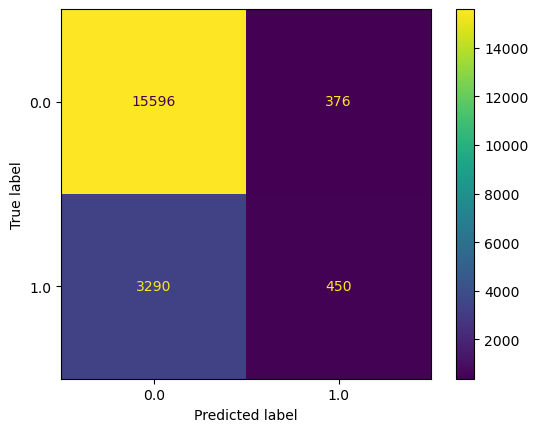

98560 10516 88044
(88044, 71)


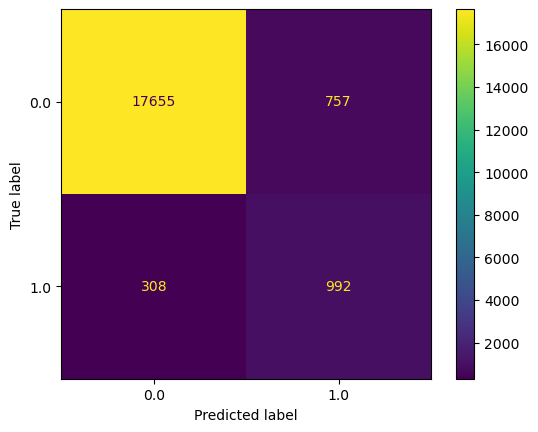

98560 10596 87964
(87964, 71)


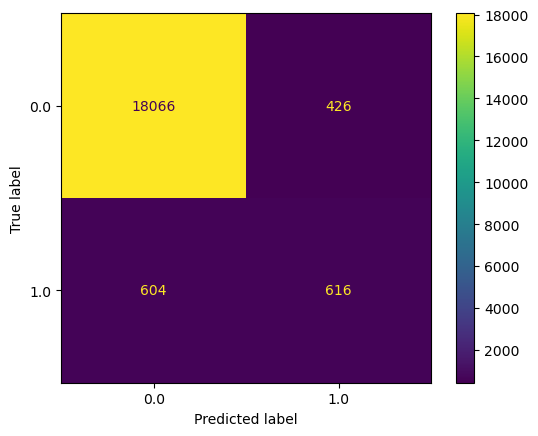

98560 10094 88466
(88466, 71)


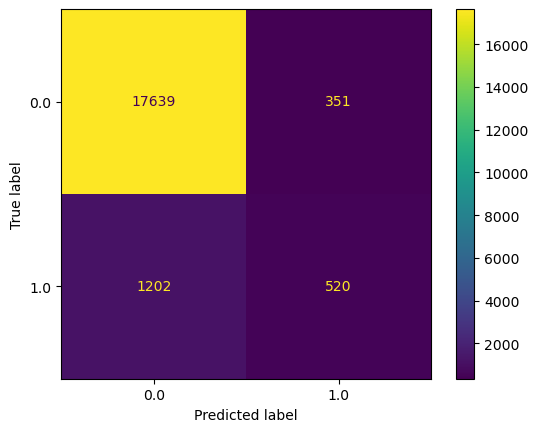

98560 9676 88884
(88884, 71)


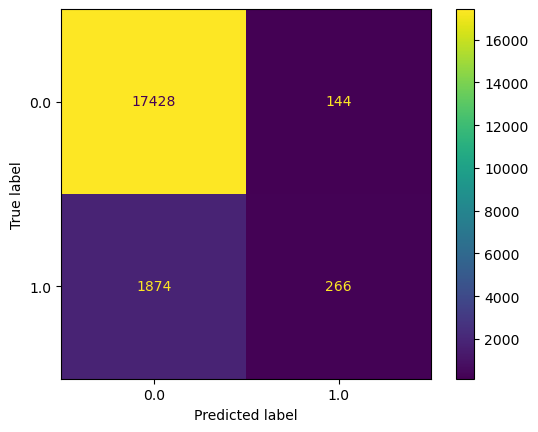

98560 10122 88438
(88438, 71)


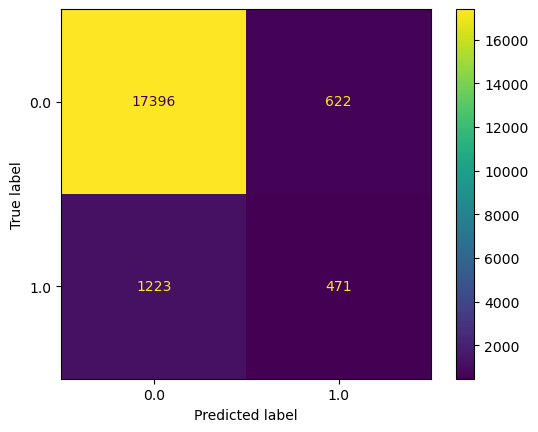

Here are the recall scores: [0.12032086 0.76307692 0.50491803 0.30197445 0.12429907 0.27804014]
Here are the precisions scores: [0.54479419 0.56718125 0.59117083 0.59701493 0.64878049 0.43092406]
Here are the accuracies scores: [0.81402192 0.945972   0.94774756 0.9212155  0.89762581 0.90640219]
Here are the f1 scores: [0.19710907 0.65070515 0.54465075 0.40107983 0.20862745 0.33799785]


In [71]:
# Example of the model in action
kf = KFold(n_splits=6, shuffle=False)

scores = score_model(RandomForestClassifier,X,y, cv=kf)
print(f'Here are the recall scores: {scores[::4]}')
print(f'Here are the precisions scores: {scores[1::4]}')
print(f'Here are the accuracies scores: {scores[2::4]}')
print(f'Here are the f1 scores: {scores[3::4]}')

98560 8076 90484
(90484, 71)


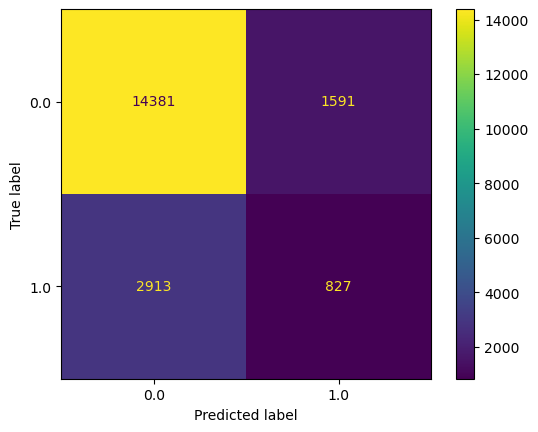

98560 10516 88044
(88044, 71)


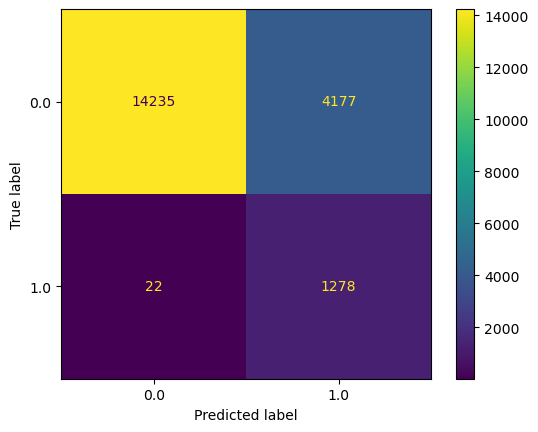

98560 10596 87964
(87964, 71)


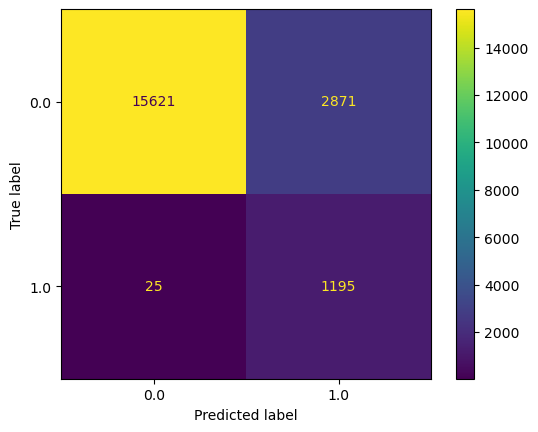

98560 10094 88466
(88466, 71)


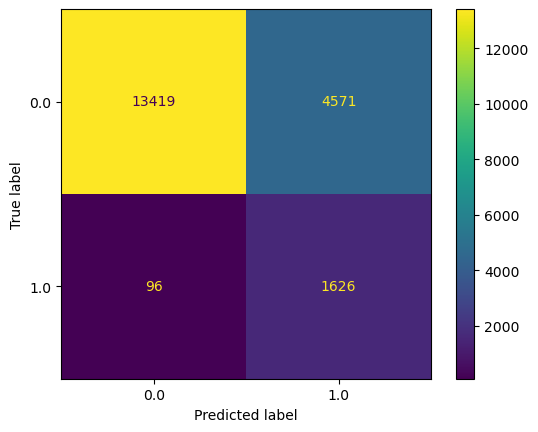

98560 9676 88884
(88884, 71)


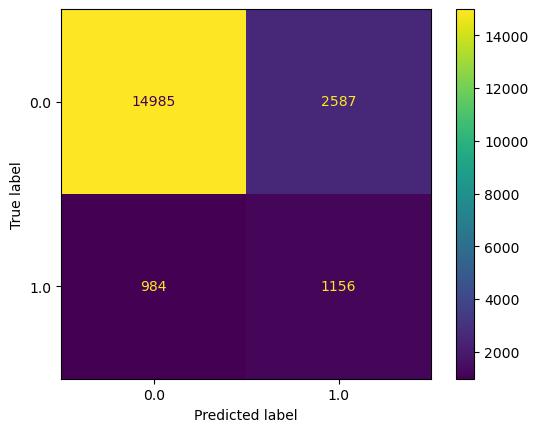

98560 10122 88438
(88438, 71)


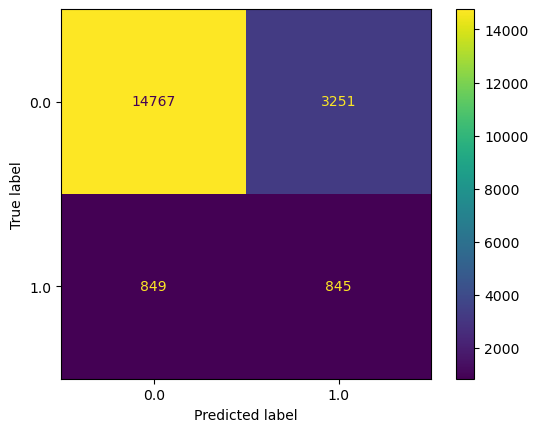

Here are the recall scores: [0.22112299 0.98307692 0.9795082  0.94425087 0.54018692 0.49881936]
Here are the precisions scores: [0.3420182  0.23428048 0.29390064 0.26238503 0.30884317 0.20629883]
Here are the accuracies scores: [0.77150974 0.78698255 0.85308442 0.76324067 0.81884131 0.79200487]
Here are the f1 scores: [0.2685937  0.37838638 0.45213772 0.41065791 0.39299677 0.29188256]


In [77]:
# Example of the model in action
params = {
        'random_state': 0,
        'tol': 1e-5,
    }

kf = KFold(n_splits=6, shuffle=False)

scores = score_model(LinearSVC,X,y,params = params, cv=kf)
print(f'Here are the recall scores: {scores[::4]}')
print(f'Here are the precisions scores: {scores[1::4]}')
print(f'Here are the accuracies scores: {scores[2::4]}')
print(f'Here are the f1 scores: {scores[3::4]}')

98560 8076 90484
(90484, 71)


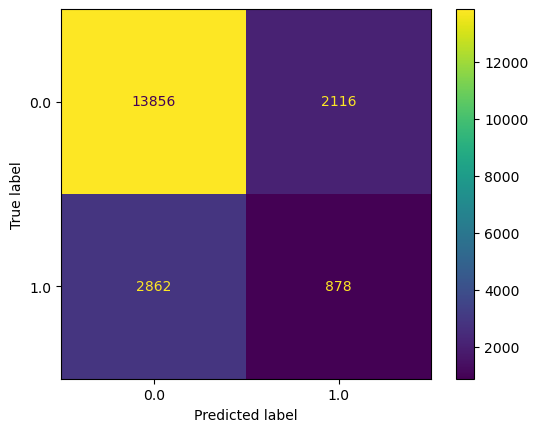

98560 10516 88044
(88044, 71)


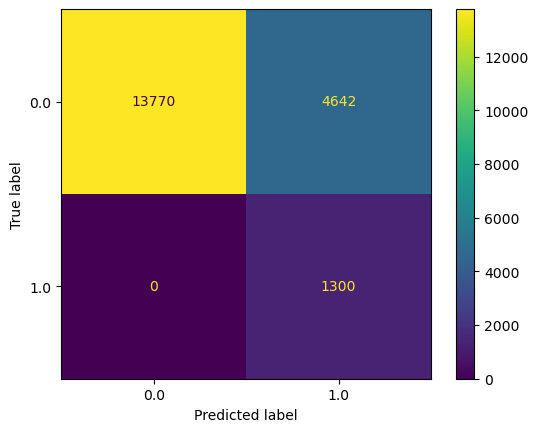

98560 10596 87964
(87964, 71)


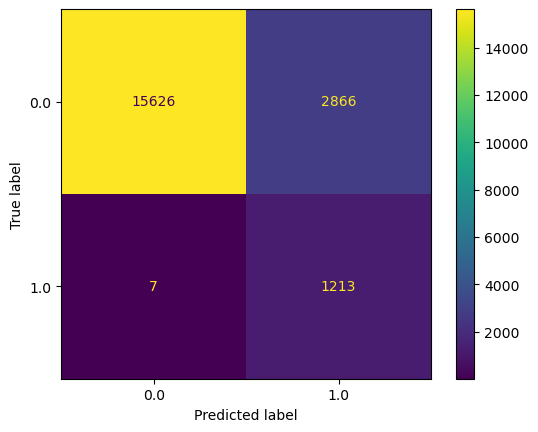

98560 10094 88466
(88466, 71)


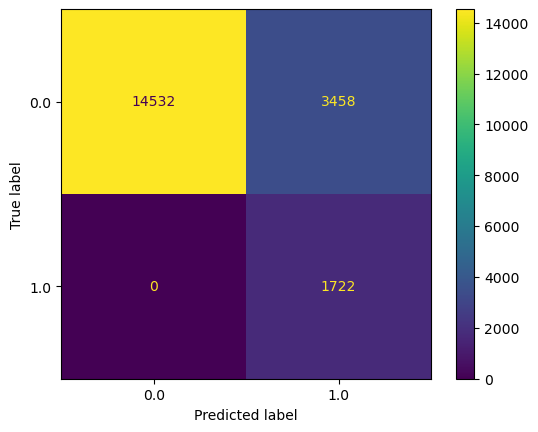

98560 9676 88884
(88884, 71)


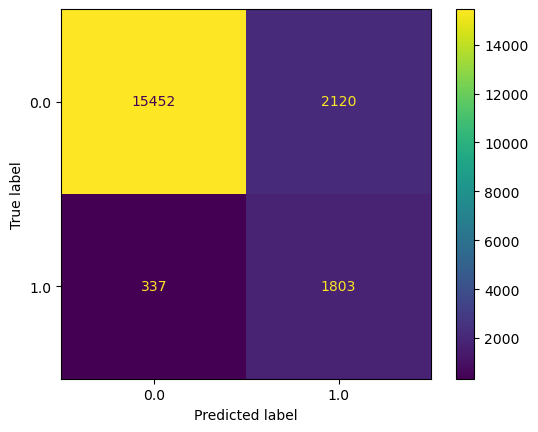

98560 10122 88438
(88438, 71)


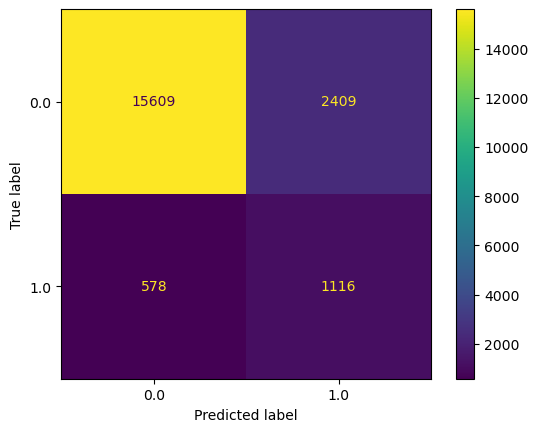

Here are the recall scores: [0.23475936 1.         0.9942623  1.         0.84252336 0.65879575]
Here are the precisions scores: [0.29325317 0.21878156 0.29737681 0.33243243 0.45959725 0.31659574]
Here are the accuracies scores: [0.74746347 0.76450893 0.85425122 0.82457386 0.87535511 0.84846794]
Here are the f1 scores: [0.26076626 0.35901685 0.45782223 0.4989858  0.59475507 0.42766814]


In [70]:
# Example of the model in action
kf = KFold(n_splits=6, shuffle=False)

scores = score_model(GaussianNB,X,y, cv=kf)
print(f'Here are the recall scores: {scores[::4]}')
print(f'Here are the precisions scores: {scores[1::4]}')
print(f'Here are the accuracies scores: {scores[2::4]}')
print(f'Here are the f1 scores: {scores[3::4]}')

In [9]:
basepath = r'C:\Users\line\Desktop\Mauro\3_DataSet\OCT_balanced'
paths = glob.glob(os.path.join(basepath,'controlP' + '\*.pickle'))
paths2 = glob.glob(os.path.join(basepath,'amdP' + '\*.pickle'))
merged = [[paths[2*i],paths[2*i+1],paths2[i]]  for i in range(len(paths2))]
flattenedmerged = [item for sublist in merged for item in sublist]
flattenedmerged
print(flattenedmerged)
X,y = getXYdata(flattenedmerged, mode = 'thickness',rootpath = basepath,normmode = 'EQ-hist')

['C:\\Users\\line\\Desktop\\Mauro\\3_DataSet\\OCT_balanced\\controlP\\0.pickle', 'C:\\Users\\line\\Desktop\\Mauro\\3_DataSet\\OCT_balanced\\controlP\\1.pickle', 'C:\\Users\\line\\Desktop\\Mauro\\3_DataSet\\OCT_balanced\\amdP\\0.pickle', 'C:\\Users\\line\\Desktop\\Mauro\\3_DataSet\\OCT_balanced\\controlP\\10.pickle', 'C:\\Users\\line\\Desktop\\Mauro\\3_DataSet\\OCT_balanced\\controlP\\11.pickle', 'C:\\Users\\line\\Desktop\\Mauro\\3_DataSet\\OCT_balanced\\amdP\\1.pickle', 'C:\\Users\\line\\Desktop\\Mauro\\3_DataSet\\OCT_balanced\\controlP\\2.pickle', 'C:\\Users\\line\\Desktop\\Mauro\\3_DataSet\\OCT_balanced\\controlP\\3.pickle', 'C:\\Users\\line\\Desktop\\Mauro\\3_DataSet\\OCT_balanced\\amdP\\2.pickle', 'C:\\Users\\line\\Desktop\\Mauro\\3_DataSet\\OCT_balanced\\controlP\\4.pickle', 'C:\\Users\\line\\Desktop\\Mauro\\3_DataSet\\OCT_balanced\\controlP\\5.pickle', 'C:\\Users\\line\\Desktop\\Mauro\\3_DataSet\\OCT_balanced\\amdP\\3.pickle', 'C:\\Users\\line\\Desktop\\Mauro\\3_DataSet\\OCT_bala

152320 27818 124502
(124502, 5)


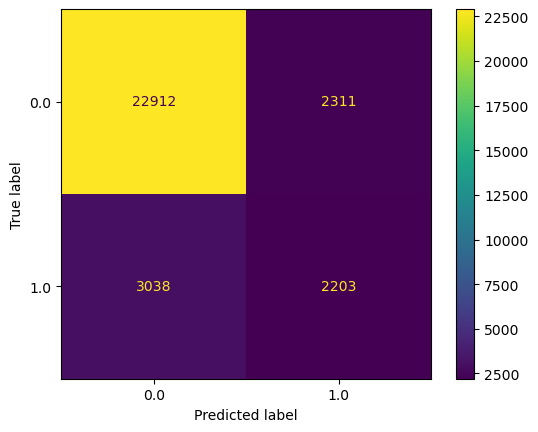

152320 30617 121703
(121703, 5)


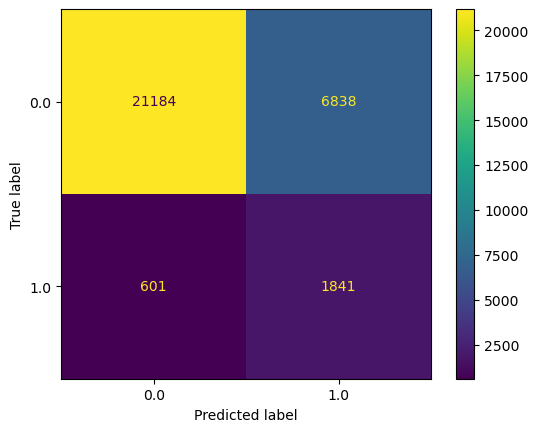

152320 28466 123854
(123854, 5)


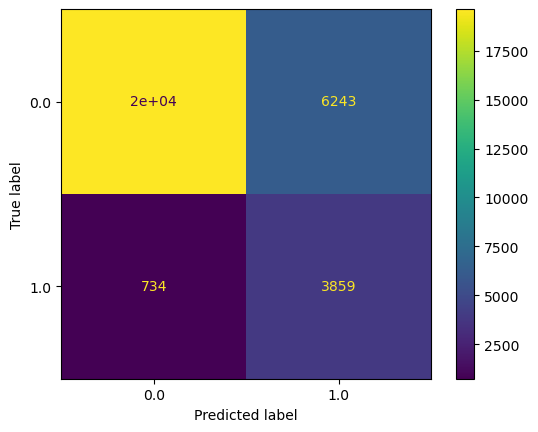

152320 27558 124762
(124762, 5)


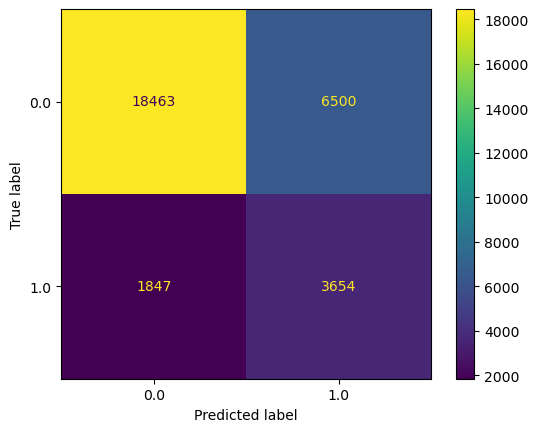

152320 25484 126836
(126836, 5)


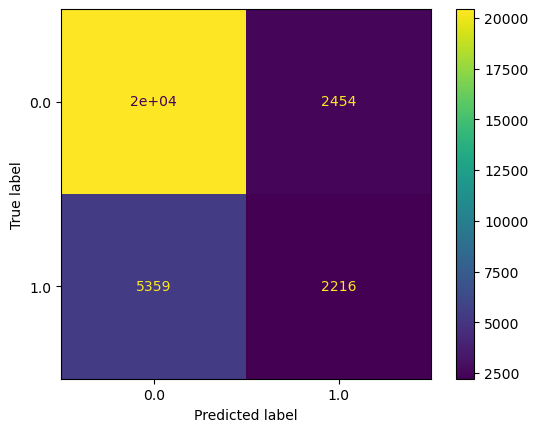

152320 25352 126968
(126968, 5)


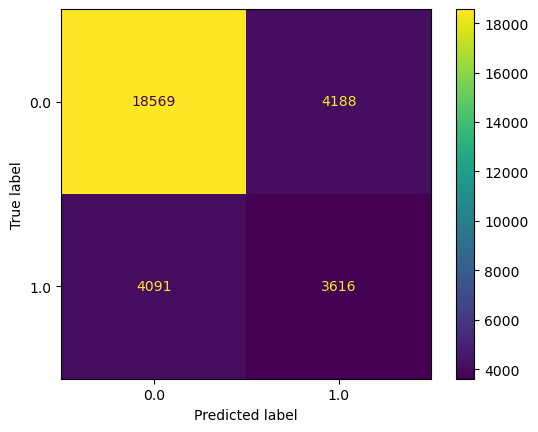

Here are the recall scores: [0.42033963 0.75389025 0.8401916  0.66424286 0.29254125 0.46918386]
Here are the precisions scores: [0.48803722 0.21212121 0.38200356 0.35985818 0.4745182  0.46335213]
Here are the accuracies scores: [0.8244157  0.75581014 0.77097558 0.72600446 0.74353335 0.72823661]
Here are the f1 scores: [0.45166581 0.33108533 0.52521266 0.46681571 0.36194365 0.46624976]


In [50]:
kf = KFold(n_splits=6, shuffle=False)

scores = score_model(GaussianNB,X,y, cv=kf)
print(f'Here are the recall scores: {scores[::4]}')
print(f'Here are the precisions scores: {scores[1::4]}')
print(f'Here are the accuracies scores: {scores[2::4]}')
print(f'Here are the f1 scores: {scores[3::4]}')

# AUGMENTING CONTEXT

In [187]:
width = 5
stride = 2
y = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13])
ynew = y[width//2:len(y) - width//2:stride]
print(ynew)

[ 2  4  6  8 10]


In [182]:
len(y) - width//2

13

In [192]:
X,y = getXYdata(flattenedmerged, mode = 'thickness',rootpath = basepath,normmode = 'EQ-hist')
print(X.shape)


(182784, 5)


In [14]:
# increasing context it's easy: we need to take
def increaseContex(X,y,stride, width):
    # Only odd width, the central column is also the labeling column
    assert width%2 == 1
    xmin = X.shape[1]
    Xnew = np.empty((0,width*xmin))
    for i in range(0,len(X)-width +1,stride):
        wdw = X[i:i+width]
        xnew = np.reshape(wdw, (1,-1))
        Xnew = np.vstack((Xnew,xnew))
    ynew = y[width//2:len(y) - width//2:stride]
    return Xnew,ynew

In [17]:
Xnew,ynew = increaseContex(X,y,stride = 7, width = 7)
print(Xnew.shape,ynew.shape)

(26112, 35) (26112,)


In [89]:
(182784 - width +stride)/stride

91391.5

In [ ]:
# I have now the problem that my folds are mixed??? Yes I should split X into folds, apply the expantion to all the folds!

In [20]:
# Let's do it for 6-folds CV
nfolds = 6
size = int(len(X)/nfolds)
size

19712

In [15]:
def increasContextWithFolds(X,y,stride = 1, width = 1):
    xmin = X.shape[1]
    X_expanded = np.empty((0,width*xmin))
    y_expanded = np.empty((0,))
    for i in range(nfolds):
        size = int(len(X)/nfolds)
        fold = X[i*size:(i+1)*size]
        print('INSIDE: ',fold.shape)
        yfold = y[i*size:(i+1)*size]
        #print(yfold.shape)
        Xfoldexp, yfoldexp = increaseContex(fold,yfold,stride = stride, width = width)
        print('HERE',Xfoldexp.shape)
        print('HEREy',yfoldexp.shape)
        X_expanded = np.vstack((X_expanded,Xfoldexp))
        y_expanded = np.hstack((y_expanded,yfoldexp))
    return X_expanded,y_expanded

In [195]:
Xexp,yexp = increasContextWithFolds(X,y)

INSIDE:  (30464, 5)
HERE (30464, 5)
HEREy (30464,)
INSIDE:  (30464, 5)
HERE (30464, 5)
HEREy (30464,)
INSIDE:  (30464, 5)
HERE (30464, 5)
HEREy (30464,)
INSIDE:  (30464, 5)
HERE (30464, 5)
HEREy (30464,)
INSIDE:  (30464, 5)
HERE (30464, 5)
HEREy (30464,)
INSIDE:  (30464, 5)
HERE (30464, 5)
HEREy (30464,)


In [196]:
print(Xexp.shape,yexp.shape)

(182784, 5) (182784,)


In [199]:
X,y = getXYdata(paths, mode = 'raw',rootpath = basepath,normmode = 'EQ-hist')
Xexp,yexp = increasContextWithFolds(X,y)
print((X == Xexp).all())
print((y == yexp).all())

INSIDE:  (19712, 71)
HERE (19712, 71)
HEREy (19712,)
INSIDE:  (19712, 71)
HERE (19712, 71)
HEREy (19712,)
INSIDE:  (19712, 71)
HERE (19712, 71)
HEREy (19712,)
INSIDE:  (19712, 71)
HERE (19712, 71)
HEREy (19712,)
INSIDE:  (19712, 71)
HERE (19712, 71)
HEREy (19712,)
INSIDE:  (19712, 71)
HERE (19712, 71)
HEREy (19712,)
True
True


In [148]:
182784/6

30464.0

98560 8076 90484
(90484, 71)


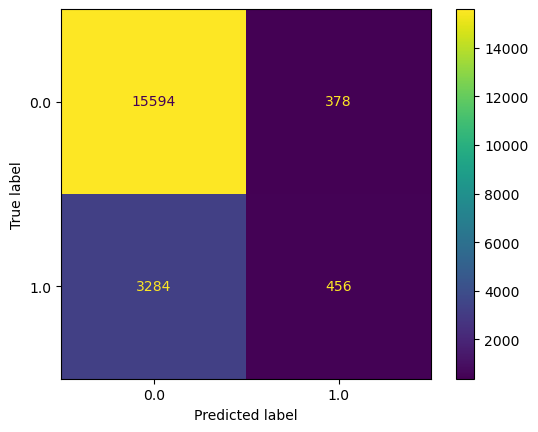

98560 10516 88044
(88044, 71)


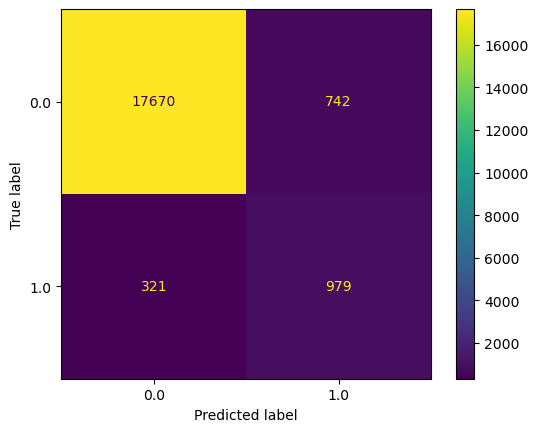

98560 10596 87964
(87964, 71)


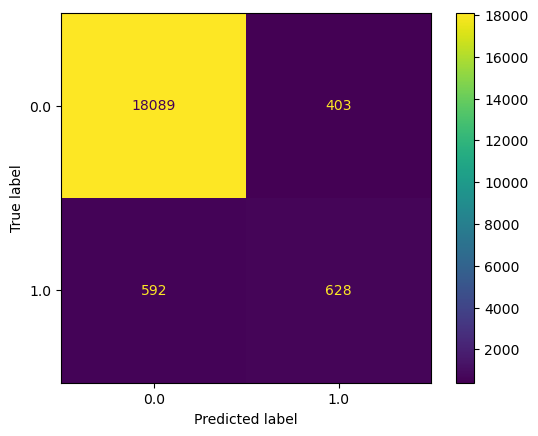

98560 10094 88466
(88466, 71)


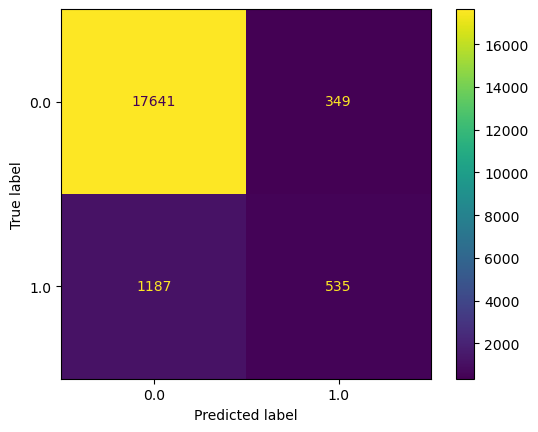

98560 9676 88884
(88884, 71)


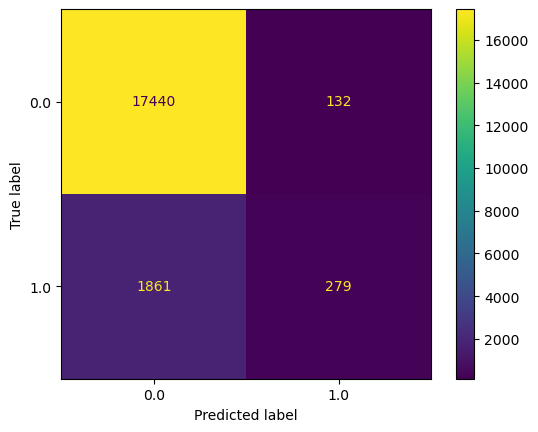

98560 10122 88438
(88438, 71)


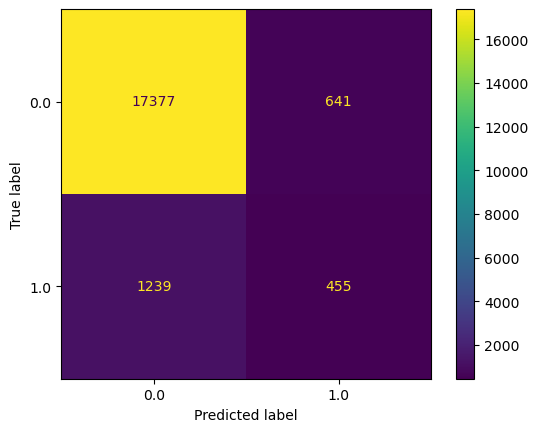

Here are the recall scores: [0.12192513 0.75307692 0.5147541  0.31068525 0.13037383 0.26859504]
Here are the precisions scores: [0.54676259 0.56885532 0.60911736 0.60520362 0.67883212 0.41514599]
Here are the accuracies scores: [0.81422484 0.94607346 0.94952313 0.92207792 0.89889407 0.90462662]
Here are the f1 scores: [0.19938784 0.64812976 0.55797423 0.41059094 0.21873775 0.32616487]


In [200]:
X,y = Xexp,yexp
# Example of the model in action
kf = KFold(n_splits=6, shuffle=False)

scores = score_model(RandomForestClassifier,X,y, cv=kf)
print(f'Here are the recall scores: {scores[::4]}')
print(f'Here are the precisions scores: {scores[1::4]}')
print(f'Here are the accuracies scores: {scores[2::4]}')
print(f'Here are the f1 scores: {scores[3::4]}')

In [203]:
print(f'Here are the recall scores: {scores[::4].mean()}')
print(f'Here are the precisions scores: {scores[1::4].mean()}')
print(f'Here are the accuracies scores: {scores[2::4].mean()}')
print(f'Here are the f1 scores: {scores[3::4].mean()}')

Here are the recall scores: 0.3499017129891789
Here are the precisions scores: 0.5706528317480611
Here are the accuracies scores: 0.9059033414502164
Here are the f1 scores: 0.39349756746650905


In [205]:
#Baseline model: Randomly spamming zeros
def BaselinePerformances(cv=None):
    """
    Creates folds manually, and upsamples within each fold.
    Returns an array of validation (recall) scores
    """    
    scores = []

    for train_fold_index, val_fold_index in cv.split(X, y):
        # Get the validation data
        X_val_fold, y_val_fold = X[val_fold_index], y[val_fold_index]

        # Score the model on the (non-upsampled) validation data
        predictions = np.zeros(y_val_fold.shape)
        print(y_val_fold)
        scores.append(recall_score(y_val_fold, predictions))
        scores.append(precision_score(y_val_fold, predictions))
        scores.append(accuracy_score(y_val_fold, predictions))
        scores.append(f1_score(y_val_fold, predictions))
    return np.array(scores)
scores = BaselinePerformances(cv=kf)
print(f'Here are the recall scores: {scores[::4].mean()}')
print(f'Here are the precisions scores: {scores[1::4].mean()}')
print(f'Here are the accuracies scores: {scores[2::4].mean()}')
print(f'Here are the f1 scores: {scores[3::4].mean()}')

[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
Here are the recall scores: 0.0
Here are the precisions scores: 0.0
Here are the accuracies scores: 0.9000946969696969
Here are the f1 scores: 0.0


C:\Users\line\.conda\envs\OCT\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\line\.conda\envs\OCT\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\line\.conda\envs\OCT\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\line\.conda\envs\OCT\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetri

# Increasing the context (w = 1, w = 2, w = 3,...)
Note that increasing context without a change in the stride can lead to a significant increase in data dimension.
Here we try with constant data dimention, aka. stride = width

In [12]:
flattenedmerged

['C:\\Users\\line\\Desktop\\Mauro\\3_DataSet\\OCT_balanced\\controlP\\0.pickle',
 'C:\\Users\\line\\Desktop\\Mauro\\3_DataSet\\OCT_balanced\\controlP\\1.pickle',
 'C:\\Users\\line\\Desktop\\Mauro\\3_DataSet\\OCT_balanced\\amdP\\0.pickle',
 'C:\\Users\\line\\Desktop\\Mauro\\3_DataSet\\OCT_balanced\\controlP\\10.pickle',
 'C:\\Users\\line\\Desktop\\Mauro\\3_DataSet\\OCT_balanced\\controlP\\11.pickle',
 'C:\\Users\\line\\Desktop\\Mauro\\3_DataSet\\OCT_balanced\\amdP\\1.pickle',
 'C:\\Users\\line\\Desktop\\Mauro\\3_DataSet\\OCT_balanced\\controlP\\2.pickle',
 'C:\\Users\\line\\Desktop\\Mauro\\3_DataSet\\OCT_balanced\\controlP\\3.pickle',
 'C:\\Users\\line\\Desktop\\Mauro\\3_DataSet\\OCT_balanced\\amdP\\2.pickle',
 'C:\\Users\\line\\Desktop\\Mauro\\3_DataSet\\OCT_balanced\\controlP\\4.pickle',
 'C:\\Users\\line\\Desktop\\Mauro\\3_DataSet\\OCT_balanced\\controlP\\5.pickle',
 'C:\\Users\\line\\Desktop\\Mauro\\3_DataSet\\OCT_balanced\\amdP\\3.pickle',
 'C:\\Users\\line\\Desktop\\Mauro\\3_DataS

INSIDE:  (19712, 71)
HERE (19712, 71)
HEREy (19712,)
INSIDE:  (19712, 71)
HERE (19712, 71)
HEREy (19712,)
INSIDE:  (19712, 71)
HERE (19712, 71)
HEREy (19712,)
INSIDE:  (19712, 71)
HERE (19712, 71)
HEREy (19712,)
INSIDE:  (19712, 71)
HERE (19712, 71)
HEREy (19712,)
INSIDE:  (19712, 71)
HERE (19712, 71)
HEREy (19712,)
98560 8076 90484
(90484, 71)
98560 10516 88044
(88044, 71)
98560 10596 87964
(87964, 71)
98560 10094 88466
(88466, 71)
98560 9676 88884
(88884, 71)
98560 10122 88438
(88438, 71)
finished iter for w = 1
INSIDE:  (19712, 71)
HERE (6570, 213)
HEREy (6570,)
INSIDE:  (19712, 71)
HERE (6570, 213)
HEREy (6570,)
INSIDE:  (19712, 71)
HERE (6570, 213)
HEREy (6570,)
INSIDE:  (19712, 71)
HERE (6570, 213)
HEREy (6570,)
INSIDE:  (19712, 71)
HERE (6570, 213)
HEREy (6570,)
INSIDE:  (19712, 71)
HERE (6570, 213)
HEREy (6570,)
32850 2694 30156
(30156, 213)
32850 3508 29342
(29342, 213)
32850 3535 29315
(29315, 213)
32850 3363 29487
(29487, 213)
32850 3225 29625
(29625, 213)
32850 3375 29475
(

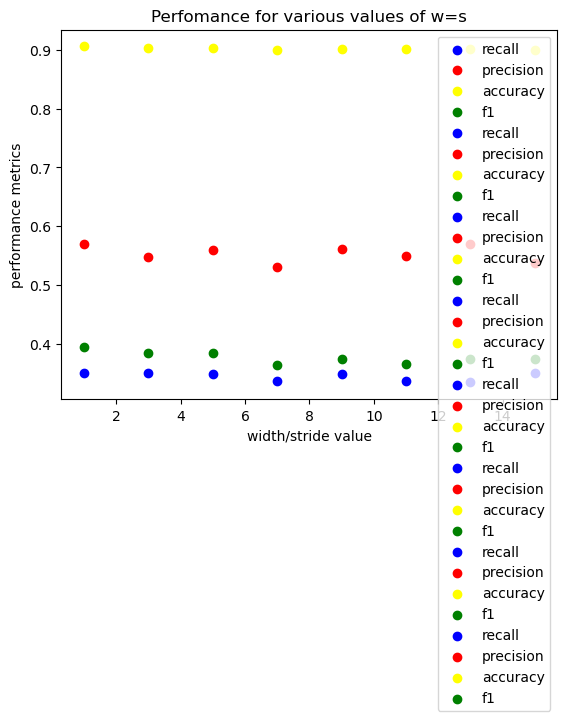

In [32]:
X,y = getXYdata(flattenedmerged, mode = 'raw',rootpath = basepath,normmode = 'EQ-hist')
for w in range(1,16,2):
    Xexp,yexp = increasContextWithFolds(X,y,stride = w, width = w)
    kf = KFold(n_splits=6, shuffle=False)
    scores = score_model(RandomForestClassifier,Xexp,yexp, cv=kf)
    recall = scores[::4].mean()
    precision = scores[1::4].mean()
    accuracy = scores[2::4].mean()
    f1 = scores[3::4].mean()
    if label:
        plt.scatter(w, recall, c='blue',label = 'recall')
        plt.scatter(w, precision, c='red',label = 'precision')
        plt.scatter(w, accuracy, c='yellow',label = 'accuracy')
        plt.scatter(w, f1, c='green',label = 'f1')
    else:
        plt.scatter(w, recall, c='blue')
        plt.scatter(w, precision, c='red')
        plt.scatter(w, accuracy, c='yellow')
        plt.scatter(w, f1, c='green')
    print(f'finished iter for w = {w}')
plt.title('Perfomance for various values of w=s')
plt.xlabel('width/stride value')
plt.ylabel('performance metrics')
plt.legend()
plt.show()

# Increasing stride for a given (optimal) context width

INSIDE:  (30464, 71)
HERE (6093, 71)
HEREy (6093,)
INSIDE:  (30464, 71)
HERE (6093, 71)
HEREy (6093,)
INSIDE:  (30464, 71)
HERE (6093, 71)
HEREy (6093,)
INSIDE:  (30464, 71)
HERE (6093, 71)
HEREy (6093,)
INSIDE:  (30464, 71)
HERE (6093, 71)
HEREy (6093,)
INSIDE:  (30464, 71)
HERE (6093, 71)
HEREy (6093,)
30465 5558 24907
(24907, 71)
30465 6116 24349
(24349, 71)
30465 5690 24775
(24775, 71)
30465 5504 24961
(24961, 71)
30465 5092 25373
(25373, 71)
30465 5065 25400
(25400, 71)
finished iter for w = 1
INSIDE:  (30464, 71)
HERE (6093, 213)
HEREy (6093,)
INSIDE:  (30464, 71)
HERE (6093, 213)
HEREy (6093,)
INSIDE:  (30464, 71)
HERE (6093, 213)
HEREy (6093,)
INSIDE:  (30464, 71)
HERE (6093, 213)
HEREy (6093,)
INSIDE:  (30464, 71)
HERE (6093, 213)
HEREy (6093,)
INSIDE:  (30464, 71)
HERE (6093, 213)
HEREy (6093,)
30465 5563 24902
(24902, 213)
30465 6118 24347
(24347, 213)
30465 5690 24775
(24775, 213)
30465 5506 24959
(24959, 213)
30465 5094 25371
(25371, 213)
30465 5069 25396
(25396, 213)
fini

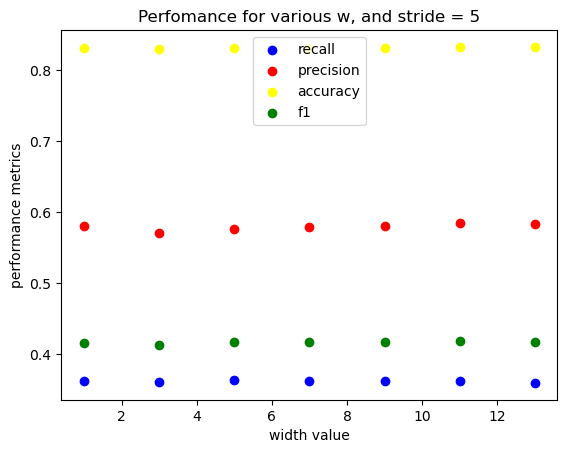

In [22]:
X,y = getXYdata(flattenedmerged, mode = 'raw',rootpath = basepath,normmode = 'EQ-hist')
label = True
for w in range(1,14,2):
    Xexp,yexp = increasContextWithFolds(X,y,stride = 5, width = w)
    kf = KFold(n_splits=6, shuffle=False)
    scores = score_model(RandomForestClassifier,Xexp,yexp, cv=kf)
    recall = scores[::4].mean()
    precision = scores[1::4].mean()
    accuracy = scores[2::4].mean()
    f1 = scores[3::4].mean()
    if label:
        plt.scatter(w, recall, c='blue',label = 'recall')
        plt.scatter(w, precision, c='red',label = 'precision')
        plt.scatter(w, accuracy, c='yellow',label = 'accuracy')
        plt.scatter(w, f1, c='green',label = 'f1')
        label = False
    else:
        plt.scatter(w, recall, c='blue')
        plt.scatter(w, precision, c='red')
        plt.scatter(w, accuracy, c='yellow')
        plt.scatter(w, f1, c='green')
        
    print(f'finished iter for w = {w}')
plt.title('Perfomance for various w, and stride = 5')
plt.xlabel('width value')
plt.ylabel('performance metrics')
plt.legend()
plt.show()

INSIDE:  (32256, 71)
HERE (32254, 213)
HEREy (32254,)
INSIDE:  (32256, 71)
HERE (32254, 213)
HEREy (32254,)
INSIDE:  (32256, 71)
HERE (32254, 213)
HEREy (32254,)
INSIDE:  (32256, 71)
HERE (32254, 213)
HEREy (32254,)
INSIDE:  (32256, 71)
HERE (32254, 213)
HEREy (32254,)
INSIDE:  (32256, 71)
HERE (32254, 213)
HEREy (32254,)
161270 28155 133115
(133115, 213)
161270 31386 129884
(129884, 213)
161270 28410 132860
(132860, 213)
161270 28072 133198
(133198, 213)
161270 25567 135703
(135703, 213)
161270 25700 135570
(135570, 213)


NameError: name 'w' is not defined

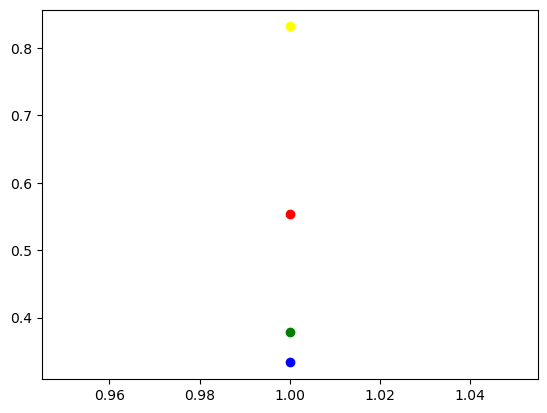

In [5]:
X,y = getXYdata(flattenedmerged, mode = 'raw',rootpath = basepath,normmode = 'EQ-hist')
label = True
for s in range(1,10):
    Xexp,yexp = increasContextWithFolds(X,y,stride = s, width = 3)
    kf = KFold(n_splits=6, shuffle=False)
    scores = score_model(RandomForestClassifier,Xexp,yexp, cv=kf)
    recall = scores[::4].mean()
    precision = scores[1::4].mean()
    accuracy = scores[2::4].mean()
    f1 = scores[3::4].mean()
    if label:
        plt.scatter(s, recall, c='blue',label = 'recall')
        plt.scatter(s, precision, c='red',label = 'precision')
        plt.scatter(s, accuracy, c='yellow',label = 'accuracy')
        plt.scatter(s, f1, c='green',label = 'f1')
        label = False
    else:
        plt.scatter(s, recall, c='blue')
        plt.scatter(s, precision, c='red')
        plt.scatter(s, accuracy, c='yellow')
        plt.scatter(s, f1, c='green')
    print(f'finished iter for stride = {s}')
plt.title('Perfomance for various strides, and w = 3')
plt.xlabel('stride value')
plt.ylabel('performance metrics')
plt.legend()
plt.show()

In [ ]:
X,y = getXYdata(flattenedmerged, mode = 'raw',rootpath = basepath,normmode = 'EQ-hist')
label = True
for s in range(1,50,10):
    Xexp,yexp = increasContextWithFolds(X,y,stride = s, width = 3)
    kf = KFold(n_splits=6, shuffle=False)
    scores = score_model(RandomForestClassifier,Xexp,yexp, cv=kf)
    recall = scores[::4].mean()
    precision = scores[1::4].mean()
    accuracy = scores[2::4].mean()
    f1 = scores[3::4].mean()
    if label:
        plt.scatter(s, recall, c='blue',label = 'recall')
        plt.scatter(s, precision, c='red',label = 'precision')
        plt.scatter(s, accuracy, c='yellow',label = 'accuracy')
        plt.scatter(s, f1, c='green',label = 'f1')
        label = False
    else:
        plt.scatter(s, recall, c='blue')
        plt.scatter(s, precision, c='red')
        plt.scatter(s, accuracy, c='yellow')
        plt.scatter(s, f1, c='green')
    print(f'finished iter for stride = {s}')
plt.title('Perfomance for various strides, and w = 3')
plt.xlabel('stride value')
plt.ylabel('performance metrics')
plt.legend()
plt.show()

INSIDE:  (19712, 71)
HERE (19710, 213)
HEREy (19710,)
INSIDE:  (19712, 71)
HERE (19710, 213)
HEREy (19710,)
INSIDE:  (19712, 71)
HERE (19710, 213)
HEREy (19710,)
INSIDE:  (19712, 71)
HERE (19710, 213)
HEREy (19710,)
INSIDE:  (19712, 71)
HERE (19710, 213)
HEREy (19710,)
INSIDE:  (19712, 71)
HERE (19710, 213)
HEREy (19710,)
98550 8076 90474
(90474, 213)
98550 10516 88034
(88034, 213)
98550 10596 87954
(87954, 213)
98550 10094 88456
(88456, 213)
98550 9676 88874
(88874, 213)
98550 10122 88428
(88428, 213)
finished iter for w = 27
INSIDE:  (19712, 71)
HERE (9855, 213)
HEREy (9855,)
INSIDE:  (19712, 71)
HERE (9855, 213)
HEREy (9855,)
INSIDE:  (19712, 71)
HERE (9855, 213)
HEREy (9855,)
INSIDE:  (19712, 71)
HERE (9855, 213)
HEREy (9855,)
INSIDE:  (19712, 71)
HERE (9855, 213)
HEREy (9855,)
INSIDE:  (19712, 71)
HERE (9855, 213)
HEREy (9855,)
49275 4041 45234
(45234, 213)
49275 5266 44009
(44009, 213)
49275 5301 43974
(43974, 213)
49275 5053 44222
(44222, 213)
49275 4844 44431
(44431, 213)
49275

HERE (1160, 213)
HEREy (1160,)
INSIDE:  (19712, 71)
HERE (1160, 213)
HEREy (1160,)
INSIDE:  (19712, 71)
HERE (1160, 213)
HEREy (1160,)
INSIDE:  (19712, 71)
HERE (1160, 213)
HEREy (1160,)
5800 493 5307
(5307, 213)
5800 637 5163
(5163, 213)
5800 642 5158
(5158, 213)
5800 608 5192
(5192, 213)
5800 587 5213
(5213, 213)
5800 608 5192
(5192, 213)
finished iter for w = 27
INSIDE:  (19712, 71)
HERE (1095, 213)
HEREy (1095,)
INSIDE:  (19712, 71)
HERE (1095, 213)
HEREy (1095,)
INSIDE:  (19712, 71)
HERE (1095, 213)
HEREy (1095,)
INSIDE:  (19712, 71)
HERE (1095, 213)
HEREy (1095,)
INSIDE:  (19712, 71)
HERE (1095, 213)
HEREy (1095,)
INSIDE:  (19712, 71)
HERE (1095, 213)
HEREy (1095,)
5475 440 5035
(5035, 213)
5475 580 4895
(4895, 213)
5475 581 4894
(4894, 213)
5475 553 4922
(4922, 213)
5475 531 4944
(4944, 213)
5475 555 4920
(4920, 213)
finished iter for w = 27
INSIDE:  (19712, 71)
HERE (1038, 213)
HEREy (1038,)
INSIDE:  (19712, 71)
HERE (1038, 213)
HEREy (1038,)
INSIDE:  (19712, 71)
HERE (1038, 21

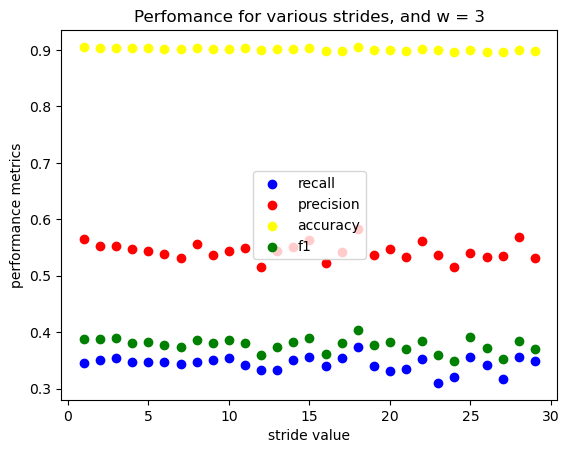

In [38]:
X,y = getXYdata(flattenedmerged, mode = 'raw',rootpath = basepath,normmode = 'EQ-hist')
label = True
for s in range(1,30):
    Xexp,yexp = increasContextWithFolds(X,y,stride = s, width = 3)
    kf = KFold(n_splits=6, shuffle=False)
    scores = score_model(RandomForestClassifier,Xexp,yexp, cv=kf)
    recall = scores[::4].mean()
    precision = scores[1::4].mean()
    accuracy = scores[2::4].mean()
    f1 = scores[3::4].mean()
    if label:
        plt.scatter(s, recall, c='blue',label = 'recall')
        plt.scatter(s, precision, c='red',label = 'precision')
        plt.scatter(s, accuracy, c='yellow',label = 'accuracy')
        plt.scatter(s, f1, c='green',label = 'f1')
        label = False
    else:
        plt.scatter(s, recall, c='blue')
        plt.scatter(s, precision, c='red')
        plt.scatter(s, accuracy, c='yellow')
        plt.scatter(s, f1, c='green')
    print(f'finished iter for stride = {s}')
plt.title('Perfomance for various strides, and w = 3')
plt.xlabel('stride value')
plt.ylabel('performance metrics')
plt.legend()
plt.show()

INSIDE:  (19712, 71)
HERE (19706, 497)
HEREy (19706,)
INSIDE:  (19712, 71)
HERE (19706, 497)
HEREy (19706,)
INSIDE:  (19712, 71)
HERE (19706, 497)
HEREy (19706,)
INSIDE:  (19712, 71)
HERE (19706, 497)
HEREy (19706,)
INSIDE:  (19712, 71)
HERE (19706, 497)
HEREy (19706,)
INSIDE:  (19712, 71)
HERE (19706, 497)
HEREy (19706,)
98530 8076 90454
(90454, 497)
98530 10516 88014
(88014, 497)
98530 10596 87934
(87934, 497)
98530 10094 88436
(88436, 497)
98530 9676 88854
(88854, 497)
98530 10122 88408
(88408, 497)
finished iter for w = 27
INSIDE:  (19712, 71)
HERE (9853, 497)
HEREy (9853,)
INSIDE:  (19712, 71)
HERE (9853, 497)
HEREy (9853,)
INSIDE:  (19712, 71)
HERE (9853, 497)
HEREy (9853,)
INSIDE:  (19712, 71)
HERE (9853, 497)
HEREy (9853,)
INSIDE:  (19712, 71)
HERE (9853, 497)
HEREy (9853,)
INSIDE:  (19712, 71)
HERE (9853, 497)
HEREy (9853,)
49265 4041 45224
(45224, 497)
49265 5266 43999
(43999, 497)
49265 5301 43964
(43964, 497)
49265 5053 44212
(44212, 497)
49265 4844 44421
(44421, 497)
49265

HERE (1160, 497)
HEREy (1160,)
INSIDE:  (19712, 71)
HERE (1160, 497)
HEREy (1160,)
INSIDE:  (19712, 71)
HERE (1160, 497)
HEREy (1160,)
INSIDE:  (19712, 71)
HERE (1160, 497)
HEREy (1160,)
5800 481 5319
(5319, 497)
5800 623 5177
(5177, 497)
5800 630 5170
(5170, 497)
5800 598 5202
(5202, 497)
5800 573 5227
(5227, 497)
5800 600 5200
(5200, 497)
finished iter for w = 27
INSIDE:  (19712, 71)
HERE (1095, 497)
HEREy (1095,)
INSIDE:  (19712, 71)
HERE (1095, 497)
HEREy (1095,)
INSIDE:  (19712, 71)
HERE (1095, 497)
HEREy (1095,)
INSIDE:  (19712, 71)
HERE (1095, 497)
HEREy (1095,)
INSIDE:  (19712, 71)
HERE (1095, 497)
HEREy (1095,)
INSIDE:  (19712, 71)
HERE (1095, 497)
HEREy (1095,)
5475 448 5027
(5027, 497)
5475 586 4889
(4889, 497)
5475 589 4886
(4886, 497)
5475 561 4914
(4914, 497)
5475 537 4938
(4938, 497)
5475 564 4911
(4911, 497)
finished iter for w = 27
INSIDE:  (19712, 71)
HERE (1038, 497)
HEREy (1038,)
INSIDE:  (19712, 71)
HERE (1038, 497)
HEREy (1038,)
INSIDE:  (19712, 71)
HERE (1038, 49

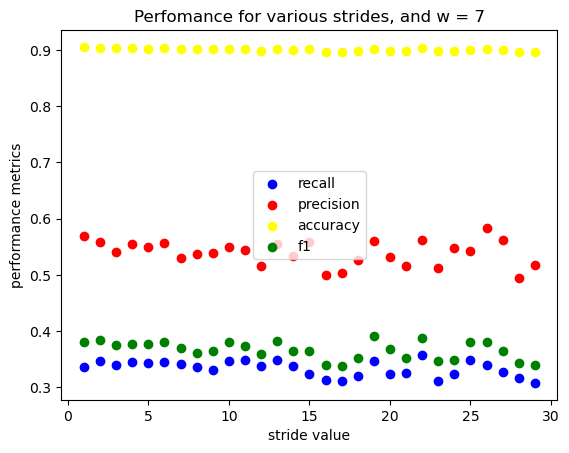

In [39]:
X,y = getXYdata(flattenedmerged, mode = 'raw',rootpath = basepath,normmode = 'EQ-hist')
label = True
for s in range(1,30):
    Xexp,yexp = increasContextWithFolds(X,y,stride = s, width = 7)
    kf = KFold(n_splits=6, shuffle=False)
    scores = score_model(RandomForestClassifier,Xexp,yexp, cv=kf)
    recall = scores[::4].mean()
    precision = scores[1::4].mean()
    accuracy = scores[2::4].mean()
    f1 = scores[3::4].mean()
    if label:
        plt.scatter(s, recall, c='blue',label = 'recall')
        plt.scatter(s, precision, c='red',label = 'precision')
        plt.scatter(s, accuracy, c='yellow',label = 'accuracy')
        plt.scatter(s, f1, c='green',label = 'f1')
        label = False
    else:
        plt.scatter(s, recall, c='blue')
        plt.scatter(s, precision, c='red')
        plt.scatter(s, accuracy, c='yellow')
        plt.scatter(s, f1, c='green')
    print(f'finished iter for w = {w}')
plt.title('Perfomance for various strides, and w = 7')
plt.xlabel('stride value')
plt.ylabel('performance metrics')
plt.legend()
plt.show()

INSIDE:  (19712, 71)
HERE (19704, 639)
HEREy (19704,)
INSIDE:  (19712, 71)
HERE (19704, 639)
HEREy (19704,)
INSIDE:  (19712, 71)
HERE (19704, 639)
HEREy (19704,)
INSIDE:  (19712, 71)
HERE (19704, 639)
HEREy (19704,)
INSIDE:  (19712, 71)
HERE (19704, 639)
HEREy (19704,)
INSIDE:  (19712, 71)
HERE (19704, 639)
HEREy (19704,)
98520 8076 90444
(90444, 639)
98520 10516 88004
(88004, 639)
98520 10596 87924
(87924, 639)
98520 10094 88426
(88426, 639)
98520 9676 88844
(88844, 639)
98520 10122 88398
(88398, 639)
finished iter for w = 27
INSIDE:  (19712, 71)
HERE (9852, 639)
HEREy (9852,)
INSIDE:  (19712, 71)
HERE (9852, 639)
HEREy (9852,)
INSIDE:  (19712, 71)
HERE (9852, 639)
HEREy (9852,)
INSIDE:  (19712, 71)
HERE (9852, 639)
HEREy (9852,)
INSIDE:  (19712, 71)
HERE (9852, 639)
HEREy (9852,)
INSIDE:  (19712, 71)
HERE (9852, 639)
HEREy (9852,)
49260 4035 45225
(45225, 639)
49260 5250 44010
(44010, 639)
49260 5295 43965
(43965, 639)
49260 5041 44219
(44219, 639)
49260 4832 44428
(44428, 639)
49260

HERE (1160, 639)
HEREy (1160,)
INSIDE:  (19712, 71)
HERE (1160, 639)
HEREy (1160,)
INSIDE:  (19712, 71)
HERE (1160, 639)
HEREy (1160,)
INSIDE:  (19712, 71)
HERE (1160, 639)
HEREy (1160,)
5800 468 5332
(5332, 639)
5800 614 5186
(5186, 639)
5800 616 5184
(5184, 639)
5800 588 5212
(5212, 639)
5800 564 5236
(5236, 639)
5800 590 5210
(5210, 639)
finished iter for w = 27
INSIDE:  (19712, 71)
HERE (1095, 639)
HEREy (1095,)
INSIDE:  (19712, 71)
HERE (1095, 639)
HEREy (1095,)
INSIDE:  (19712, 71)
HERE (1095, 639)
HEREy (1095,)
INSIDE:  (19712, 71)
HERE (1095, 639)
HEREy (1095,)
INSIDE:  (19712, 71)
HERE (1095, 639)
HEREy (1095,)
INSIDE:  (19712, 71)
HERE (1095, 639)
HEREy (1095,)
5475 450 5025
(5025, 639)
5475 584 4891
(4891, 639)
5475 591 4884
(4884, 639)
5475 559 4916
(4916, 639)
5475 537 4938
(4938, 639)
5475 564 4911
(4911, 639)
finished iter for w = 27
INSIDE:  (19712, 71)
HERE (1038, 639)
HEREy (1038,)
INSIDE:  (19712, 71)
HERE (1038, 639)
HEREy (1038,)
INSIDE:  (19712, 71)
HERE (1038, 63

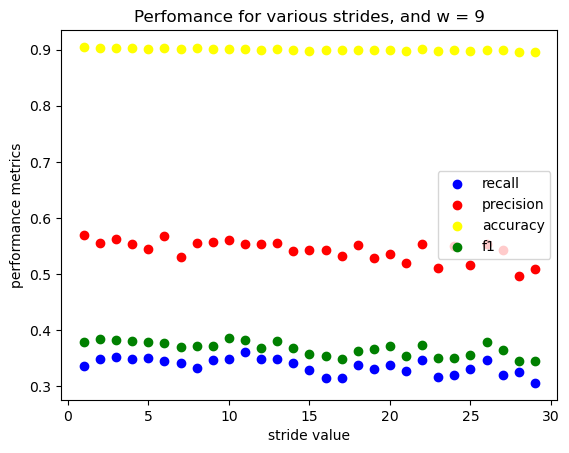

In [40]:
X,y = getXYdata(flattenedmerged, mode = 'raw',rootpath = basepath,normmode = 'EQ-hist')
label = True
for s in range(1,30):
    Xexp,yexp = increasContextWithFolds(X,y,stride = s, width = 9)
    kf = KFold(n_splits=6, shuffle=False)
    scores = score_model(RandomForestClassifier,Xexp,yexp, cv=kf)
    recall = scores[::4].mean()
    precision = scores[1::4].mean()
    accuracy = scores[2::4].mean()
    f1 = scores[3::4].mean()
    if label:
        plt.scatter(s, recall, c='blue',label = 'recall')
        plt.scatter(s, precision, c='red',label = 'precision')
        plt.scatter(s, accuracy, c='yellow',label = 'accuracy')
        plt.scatter(s, f1, c='green',label = 'f1')
        label = False
    else:
        plt.scatter(s, recall, c='blue')
        plt.scatter(s, precision, c='red')
        plt.scatter(s, accuracy, c='yellow')
        plt.scatter(s, f1, c='green')
    print(f'finished iter for w = {w}')
plt.title('Perfomance for various strides, and w = 9')
plt.xlabel('stride value')
plt.ylabel('performance metrics')
plt.legend()
plt.show()

INSIDE:  (19712, 71)
HERE (3943, 71)
HEREy (3943,)
INSIDE:  (19712, 71)
HERE (3943, 71)
HEREy (3943,)
INSIDE:  (19712, 71)
HERE (3943, 71)
HEREy (3943,)
INSIDE:  (19712, 71)
HERE (3943, 71)
HEREy (3943,)
INSIDE:  (19712, 71)
HERE (3943, 71)
HEREy (3943,)
INSIDE:  (19712, 71)
HERE (3943, 71)
HEREy (3943,)
19715 1604 18111
(18111, 71)
19715 2095 17620
(17620, 71)
19715 2111 17604
(17604, 71)
19715 2010 17705
(17705, 71)
19715 1930 17785
(17785, 71)
19715 2015 17700
(17700, 71)
finished iter for w = 1
INSIDE:  (19712, 71)
HERE (3942, 213)
HEREy (3942,)
INSIDE:  (19712, 71)
HERE (3942, 213)
HEREy (3942,)
INSIDE:  (19712, 71)
HERE (3942, 213)
HEREy (3942,)
INSIDE:  (19712, 71)
HERE (3942, 213)
HEREy (3942,)
INSIDE:  (19712, 71)
HERE (3942, 213)
HEREy (3942,)
INSIDE:  (19712, 71)
HERE (3942, 213)
HEREy (3942,)
19710 1610 18100
(18100, 213)
19710 2099 17611
(17611, 213)
19710 2115 17595
(17595, 213)
19710 2014 17696
(17696, 213)
19710 1933 17777
(17777, 213)
19710 2024 17686
(17686, 213)
fini

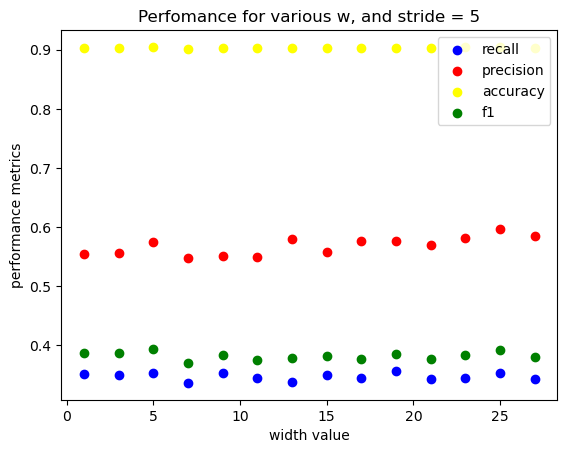

In [37]:
X,y = getXYdata(flattenedmerged, mode = 'raw',rootpath = basepath,normmode = 'EQ-hist')
label = True
for w in range(1,28,2):
    Xexp,yexp = increasContextWithFolds(X,y,stride = 5, width = w)
    kf = KFold(n_splits=6, shuffle=False)
    scores = score_model(RandomForestClassifier,Xexp,yexp, cv=kf)
    recall = scores[::4].mean()
    precision = scores[1::4].mean()
    accuracy = scores[2::4].mean()
    f1 = scores[3::4].mean()
    if label:
        plt.scatter(w, recall, c='blue',label = 'recall')
        plt.scatter(w, precision, c='red',label = 'precision')
        plt.scatter(w, accuracy, c='yellow',label = 'accuracy')
        plt.scatter(w, f1, c='green',label = 'f1')
        label = False
    else:
        plt.scatter(w, recall, c='blue')
        plt.scatter(w, precision, c='red')
        plt.scatter(w, accuracy, c='yellow')
        plt.scatter(w, f1, c='green')
        
    print(f'finished iter for w = {w}')
plt.title('Perfomance for various w, and stride = 5')
plt.xlabel('width value')
plt.ylabel('performance metrics')
plt.legend()
plt.show()

INSIDE:  (30464, 71)
HERE (6093, 71)
HEREy (6093,)
INSIDE:  (30464, 71)
HERE (6093, 71)
HEREy (6093,)
INSIDE:  (30464, 71)
HERE (6093, 71)
HEREy (6093,)
INSIDE:  (30464, 71)
HERE (6093, 71)
HEREy (6093,)
INSIDE:  (30464, 71)
HERE (6093, 71)
HEREy (6093,)
INSIDE:  (30464, 71)
HERE (6093, 71)
HEREy (6093,)
30465 5558 24907
(24907, 71)
30465 6116 24349
(24349, 71)
30465 5690 24775
(24775, 71)
30465 5504 24961
(24961, 71)
30465 5092 25373
(25373, 71)
30465 5065 25400
(25400, 71)
finished iter for w = 1
INSIDE:  (30464, 71)
HERE (6093, 213)
HEREy (6093,)
INSIDE:  (30464, 71)
HERE (6093, 213)
HEREy (6093,)
INSIDE:  (30464, 71)
HERE (6093, 213)
HEREy (6093,)
INSIDE:  (30464, 71)
HERE (6093, 213)
HEREy (6093,)
INSIDE:  (30464, 71)
HERE (6093, 213)
HEREy (6093,)
INSIDE:  (30464, 71)
HERE (6093, 213)
HEREy (6093,)
30465 5563 24902
(24902, 213)
30465 6118 24347
(24347, 213)
30465 5690 24775
(24775, 213)
30465 5506 24959
(24959, 213)
30465 5094 25371
(25371, 213)
30465 5069 25396
(25396, 213)
fini

(24319, 2201)
30435 5690 24745
(24745, 2201)
30435 5504 24931
(24931, 2201)
30435 5092 25343
(25343, 2201)
30435 5065 25370
(25370, 2201)
finished iter for w = 31
INSIDE:  (30464, 71)
HERE (6087, 2343)
HEREy (6087,)
INSIDE:  (30464, 71)
HERE (6087, 2343)
HEREy (6087,)
INSIDE:  (30464, 71)
HERE (6087, 2343)
HEREy (6087,)
INSIDE:  (30464, 71)
HERE (6087, 2343)
HEREy (6087,)
INSIDE:  (30464, 71)
HERE (6087, 2343)
HEREy (6087,)
INSIDE:  (30464, 71)
HERE (6087, 2343)
HEREy (6087,)
30435 5563 24872
(24872, 2343)
30435 6118 24317
(24317, 2343)
30435 5690 24745
(24745, 2343)
30435 5506 24929
(24929, 2343)
30435 5094 25341
(25341, 2343)
30435 5069 25366
(25366, 2343)
finished iter for w = 33


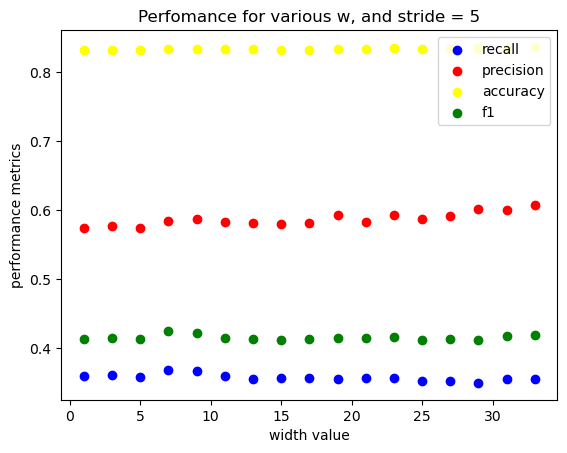

In [21]:
X,y = getXYdata(flattenedmerged, mode = 'raw',rootpath = basepath,normmode = 'EQ-hist')
label = True
for w in range(1,35,2):
    Xexp,yexp = increasContextWithFolds(X,y,stride = 5, width = w)
    kf = KFold(n_splits=6, shuffle=False)
    scores = score_model(RandomForestClassifier,Xexp,yexp, cv=kf)
    recall = scores[::4].mean()
    precision = scores[1::4].mean()
    accuracy = scores[2::4].mean()
    f1 = scores[3::4].mean()
    if label:
        plt.scatter(w, recall, c='blue',label = 'recall')
        plt.scatter(w, precision, c='red',label = 'precision')
        plt.scatter(w, accuracy, c='yellow',label = 'accuracy')
        plt.scatter(w, f1, c='green',label = 'f1')
        label = False
    else:
        plt.scatter(w, recall, c='blue')
        plt.scatter(w, precision, c='red')
        plt.scatter(w, accuracy, c='yellow')
        plt.scatter(w, f1, c='green')
        
    print(f'finished iter for w = {w}')
plt.title('Perfomance for various w, and stride = 5')
plt.xlabel('width value')
plt.ylabel('performance metrics')
plt.legend()
plt.show()

INSIDE:  (32256, 71)
HERE (6445, 2485)
HEREy (6445,)
INSIDE:  (32256, 71)
HERE (6445, 2485)
HEREy (6445,)
INSIDE:  (32256, 71)
HERE (6445, 2485)
HEREy (6445,)
INSIDE:  (32256, 71)
HERE (6445, 2485)
HEREy (6445,)
INSIDE:  (32256, 71)
HERE (6445, 2485)
HEREy (6445,)
INSIDE:  (32256, 71)
HERE (6445, 2485)
HEREy (6445,)
32225 5633 26592
(26592, 2485)
32225 6278 25947
(25947, 2485)
32225 5688 26537
(26537, 2485)
32225 5619 26606
(26606, 2485)
32225 5116 27109
(27109, 2485)
32225 5146 27079
(27079, 2485)
finished iter for w = 35
INSIDE:  (32256, 71)
HERE (6444, 2627)
HEREy (6444,)
INSIDE:  (32256, 71)
HERE (6444, 2627)
HEREy (6444,)
INSIDE:  (32256, 71)
HERE (6444, 2627)
HEREy (6444,)
INSIDE:  (32256, 71)
HERE (6444, 2627)
HEREy (6444,)
INSIDE:  (32256, 71)
HERE (6444, 2627)
HEREy (6444,)
INSIDE:  (32256, 71)
HERE (6444, 2627)
HEREy (6444,)
32220 5622 26598
(26598, 2627)
32220 6269 25951
(25951, 2627)
32220 5675 26545
(26545, 2627)
32220 5607 26613
(26613, 2627)
32220 5101 27119
(27119, 2627

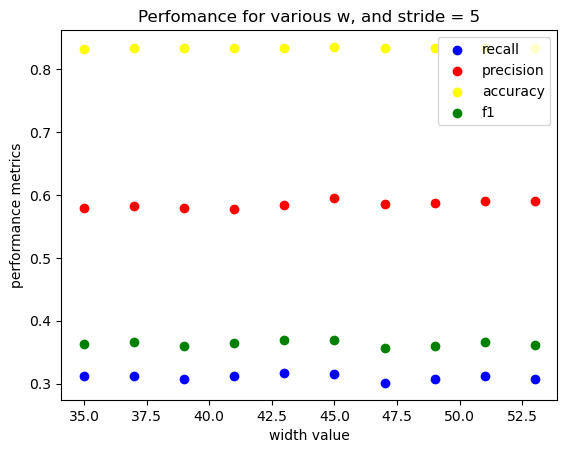

In [5]:
X,y = getXYdata(flattenedmerged, mode = 'raw',rootpath = basepath,normmode = 'EQ-hist')
label = True
for w in range(35,55,2):
    Xexp,yexp = increasContextWithFolds(X,y,stride = 5, width = w)
    kf = KFold(n_splits=6, shuffle=False)
    scores = score_model(RandomForestClassifier,Xexp,yexp, cv=kf)
    recall = scores[::4].mean()
    precision = scores[1::4].mean()
    accuracy = scores[2::4].mean()
    f1 = scores[3::4].mean()
    if label:
        plt.scatter(w, recall, c='blue',label = 'recall')
        plt.scatter(w, precision, c='red',label = 'precision')
        plt.scatter(w, accuracy, c='yellow',label = 'accuracy')
        plt.scatter(w, f1, c='green',label = 'f1')
        label = False
    else:
        plt.scatter(w, recall, c='blue')
        plt.scatter(w, precision, c='red')
        plt.scatter(w, accuracy, c='yellow')
        plt.scatter(w, f1, c='green')
        
    print(f'finished iter for w = {w}')
plt.title('Perfomance for various w, and stride = 5')
plt.xlabel('width value')
plt.ylabel('performance metrics')
plt.legend()
plt.show()

INSIDE:  (32256, 71)
HERE (6441, 3905)
HEREy (6441,)
INSIDE:  (32256, 71)
HERE (6441, 3905)
HEREy (6441,)
INSIDE:  (32256, 71)
HERE (6441, 3905)
HEREy (6441,)
INSIDE:  (32256, 71)
HERE (6441, 3905)
HEREy (6441,)
INSIDE:  (32256, 71)
HERE (6441, 3905)
HEREy (6441,)
INSIDE:  (32256, 71)
HERE (6441, 3905)
HEREy (6441,)
32205 5633 26572
(26572, 3905)
32205 6278 25927
(25927, 3905)
32205 5688 26517
(26517, 3905)
32205 5619 26586
(26586, 3905)
32205 5116 27089
(27089, 3905)
32205 5146 27059
(27059, 3905)
finished iter for w = 55
INSIDE:  (32256, 71)
HERE (6440, 4047)
HEREy (6440,)
INSIDE:  (32256, 71)
HERE (6440, 4047)
HEREy (6440,)
INSIDE:  (32256, 71)
HERE (6440, 4047)
HEREy (6440,)
INSIDE:  (32256, 71)
HERE (6440, 4047)
HEREy (6440,)
INSIDE:  (32256, 71)
HERE (6440, 4047)
HEREy (6440,)
INSIDE:  (32256, 71)
HERE (6440, 4047)
HEREy (6440,)
32200 5622 26578
(26578, 4047)
32200 6269 25931
(25931, 4047)
32200 5675 26525
(26525, 4047)
32200 5607 26593
(26593, 4047)
32200 5101 27099
(27099, 4047

KeyboardInterrupt: 

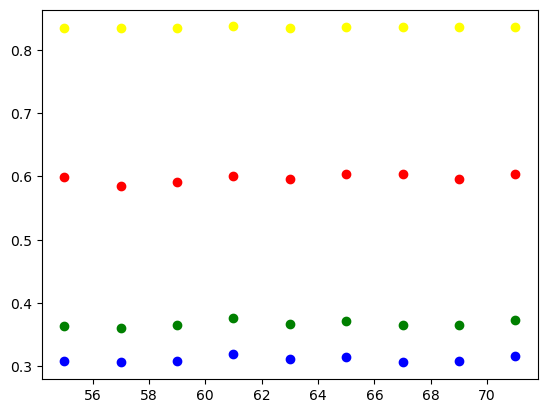

In [6]:
X,y = getXYdata(flattenedmerged, mode = 'raw',rootpath = basepath,normmode = 'EQ-hist')
label = True
for w in range(55,85,2):
    Xexp,yexp = increasContextWithFolds(X,y,stride = 5, width = w)
    kf = KFold(n_splits=6, shuffle=False)
    scores = score_model(RandomForestClassifier,Xexp,yexp, cv=kf)
    recall = scores[::4].mean()
    precision = scores[1::4].mean()
    accuracy = scores[2::4].mean()
    f1 = scores[3::4].mean()
    if label:
        plt.scatter(w, recall, c='blue',label = 'recall')
        plt.scatter(w, precision, c='red',label = 'precision')
        plt.scatter(w, accuracy, c='yellow',label = 'accuracy')
        plt.scatter(w, f1, c='green',label = 'f1')
        label = False
    else:
        plt.scatter(w, recall, c='blue')
        plt.scatter(w, precision, c='red')
        plt.scatter(w, accuracy, c='yellow')
        plt.scatter(w, f1, c='green')
        
    print(f'finished iter for w = {w}')
plt.title('Perfomance for various w, and stride = 5')
plt.xlabel('width value')
plt.ylabel('performance metrics')
plt.legend()
plt.show()

# CNN

In [2]:
nfolds = 6

In [3]:
# Create a cv that specifies the folds of my dataset, basically to avoid shuffling
# Having 12 control patients, splits should be divisors of 12, eg: 2 fold, 3-fold, 4-fold, 6-fold, 12-fold
from sklearn.metrics import ConfusionMatrixDisplay
import cv2
from sklearn.model_selection import KFold
import glob

def score_model(model,X,y, params = None, cv=None,plotMatrix = None):
    """
    Creates folds manually, and upsamples within each fold.
    Returns an array of validation (recall) scores
    """
    #smoter = SMOTE(random_state=42)
    
    scores = []

    for train_fold_index, val_fold_index in cv.split(X, y):
        # Get the training data
        X_train_fold, y_train_fold = X[train_fold_index], y[train_fold_index]
        # Get the validation data
        X_val_fold, y_val_fold = X[val_fold_index], y[val_fold_index]

        # Upsample only the data in the training section
        #X_train_fold_upsample, y_train_fold_upsample = smoter.fit_resample(X_train_fold,y_train_fold)
        X_train_fold_upsample, y_train_fold_upsample = upsample(X_train_fold,y_train_fold)                                                                   
        # Fit the model on the upsampled training data
        if params:
            model_obj = model(**params).fit(X_train_fold_upsample, y_train_fold_upsample)
        else:
            model_obj = model().fit(X_train_fold_upsample, y_train_fold_upsample)
        if(plotMatrix):
            # Display confusion matrix
            ConfusionMatrixDisplay.from_estimator(model_obj, X_val_fold, y_val_fold)
            plt.show()
        
        # Score the model on the (non-upsampled) validation data
        predictions = model_obj.predict(X_val_fold)
        scores.append(recall_score(y_val_fold, predictions))
        scores.append(precision_score(y_val_fold, predictions))
        scores.append(accuracy_score(y_val_fold, predictions))
        scores.append(f1_score(y_val_fold, predictions))
    return np.array(scores)

# Creation of NP arrays X and y

def getXYdata(paths, mode,rootpath = None,normmode = 'Z-score'):
    def normalize(img,normmode = 'Z-score'):
        if normmode == 'Z-score':
            img = dataset.z_score(img)
        elif normmode == 'EQ-hist': 
            img = exposure.equalize_hist(img)
        elif normmode == 'CLAHE':
            #TO Implement normalization by zone
            # Adaptive Equalization
            img = exposure.equalize_adapthist(img/max((img.max(),-img.min())), clip_limit=0.03)            
        return img
    
    def getxmin(rootpath):
        themin = 100000
        allpaths =  glob.glob(os.path.join(rootpath,'amdP' + '\*.pickle')) + glob.glob(os.path.join(rootpath,'controlP' + '\*.pickle'))
        for path in allpaths:
            PPocts = pd.read_pickle(path)
            for PPoct in PPocts:
                xnew = PPoct.image()
                if(xnew.shape[0] < themin):
                    themin = xnew.shape[0]
        return themin
    
    if mode == 'thickness':
        xmin = 5 
    elif mode =='raw':
        xmin = getxmin(rootpath)
        
    X = np.empty((0,xmin))
    y = np.empty((0,))
    #groupvect = np.empty((0,))
    for path in paths:
        #group = path.split("\\").pop().split("_")[0]
        PPocts = pd.read_pickle(path)
        for PPoct in PPocts:
            if mode == 'thickness':
                xnew = np.transpose(PPoct.thicknesses())
            elif mode == 'raw':
                xnew = np.transpose(normalize(PPoct.image(),normmode = normmode))
                #xnew = np.pad(xnew, ((0, 0), (xmax - xnew.shape[1], 0)), 'constant')
                xnew = cv2.resize(xnew, dsize=(xmin,768 ))
            ynew = PPoct.label()
            #stack vertically the x and y
            X = np.vstack((X,xnew))
            y = np.hstack((y,ynew))
#             if(group == 'amd'):
#                 groupvect = np.hstack((groupvect,np.ones(ynew.shape)))
#             else:
#                 groupvect = np.hstack((groupvect,np.zeros(ynew.shape)))          
      
    return X,y  #,groupvect

# increasing context it's easy: we need to take
def increaseContex(X,y,stride, width,step = 1):
    assert width%2 == 1
    xmin = X.shape[1]
    Xnew = np.empty((0,width*xmin))
    #for i in range(0,len(X)-width +1,stride):
    for i in range(0,len(X)-(width-1)*step,stride):
        wdw = X[i:i+width*step:step]
        xnew = np.reshape(wdw, (1,-1))
        Xnew = np.vstack((Xnew,xnew))
    ynew = y[width//2:len(y) - width//2:stride]
    return Xnew,ynew

def increasContextWithFolds(X,y,stride = 1, width = 1):
    xmin = X.shape[1]
    X_expanded = np.empty((0,width*xmin))
    y_expanded = np.empty((0,))
    for i in range(nfolds):
        size = int(len(X)/nfolds)
        fold = X[i*size:(i+1)*size]
        print('INSIDE: ',fold.shape)
        yfold = y[i*size:(i+1)*size]
        #print(yfold.shape)
        Xfoldexp, yfoldexp = increaseContex(fold,yfold,stride = stride, width = width)
        print('HERE',Xfoldexp.shape)
        print('HEREy',yfoldexp.shape)
        X_expanded = np.vstack((X_expanded,Xfoldexp))
        y_expanded = np.hstack((y_expanded,yfoldexp))
    return X_expanded,y_expanded



In [2]:

def getxmin(rootpath):
    themin = 100000
    allpaths =  glob.glob(os.path.join(rootpath,'amdP' + '\*.pickle')) + glob.glob(os.path.join(rootpath,'controlP' + '\*.pickle'))
    for path in allpaths:
        PPocts = pd.read_pickle(path)
        for PPoct in PPocts:
            xnew = PPoct.image()
            if(xnew.shape[0] < themin):
                themin = xnew.shape[0]
    return themin
print(getxmin(r'C:\Users\line\Desktop\Mauro\3_DataSet\OCT_balanced'))

71


In [3]:

def getxmin(rootpath):
    themin = -11000
    allpaths =  glob.glob(os.path.join(rootpath,'amdP' + '\*.pickle')) + glob.glob(os.path.join(rootpath,'controlP' + '\*.pickle'))
    for path in allpaths:
        PPocts = pd.read_pickle(path)
        for PPoct in PPocts:
            xnew = PPoct.image()
            if(xnew.shape[0] > themin):
                themin = xnew.shape[0]
    return themin
print(getxmin(r'C:\Users\line\Desktop\Mauro\3_DataSet\OCT_balanced'))

132


In [4]:
basepath = r'C:\Users\line\Desktop\Mauro\3_DataSet\OCT_balanced'
paths = glob.glob(os.path.join(basepath,'controlP' + '\*.pickle'))
paths2 = glob.glob(os.path.join(basepath,'amdP' + '\*.pickle'))
merged = [[paths[2*i],paths[2*i+1],paths2[i]]  for i in range(len(paths2))]
flattenedmerged = [item for sublist in merged for item in sublist]
flattenedmerged

['C:\\Users\\line\\Desktop\\Mauro\\3_DataSet\\OCT_balanced\\controlP\\0.pickle',
 'C:\\Users\\line\\Desktop\\Mauro\\3_DataSet\\OCT_balanced\\controlP\\10.pickle',
 'C:\\Users\\line\\Desktop\\Mauro\\3_DataSet\\OCT_balanced\\amdP\\0.pickle',
 'C:\\Users\\line\\Desktop\\Mauro\\3_DataSet\\OCT_balanced\\controlP\\11.pickle',
 'C:\\Users\\line\\Desktop\\Mauro\\3_DataSet\\OCT_balanced\\controlP\\12.pickle',
 'C:\\Users\\line\\Desktop\\Mauro\\3_DataSet\\OCT_balanced\\amdP\\1.pickle',
 'C:\\Users\\line\\Desktop\\Mauro\\3_DataSet\\OCT_balanced\\controlP\\2.pickle',
 'C:\\Users\\line\\Desktop\\Mauro\\3_DataSet\\OCT_balanced\\controlP\\3.pickle',
 'C:\\Users\\line\\Desktop\\Mauro\\3_DataSet\\OCT_balanced\\amdP\\2.pickle',
 'C:\\Users\\line\\Desktop\\Mauro\\3_DataSet\\OCT_balanced\\controlP\\4.pickle',
 'C:\\Users\\line\\Desktop\\Mauro\\3_DataSet\\OCT_balanced\\controlP\\5.pickle',
 'C:\\Users\\line\\Desktop\\Mauro\\3_DataSet\\OCT_balanced\\amdP\\3.pickle',
 'C:\\Users\\line\\Desktop\\Mauro\\3_Data

In [25]:
# TESTING
X = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16],[17,18,19,20],[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16],[17,18,19,20]])
y = np.array([0,0,1,0,0,0,0,1,0,0])

In [33]:
increaseContex(X,y,stride = 1, width = 3,step = 2)

(array([[ 1.,  2.,  3.,  4.,  9., 10., 11., 12., 17., 18., 19., 20.],
        [ 5.,  6.,  7.,  8., 13., 14., 15., 16.,  1.,  2.,  3.,  4.],
        [ 9., 10., 11., 12., 17., 18., 19., 20.,  5.,  6.,  7.,  8.],
        [13., 14., 15., 16.,  1.,  2.,  3.,  4.,  9., 10., 11., 12.],
        [17., 18., 19., 20.,  5.,  6.,  7.,  8., 13., 14., 15., 16.],
        [ 1.,  2.,  3.,  4.,  9., 10., 11., 12., 17., 18., 19., 20.]]),
 array([0, 1, 0, 0, 0, 0, 1, 0]))